In [1]:
#import sys
import psycopg2
import pandas as pd
import numpy as np
#import json
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization
from sklearn.decomposition import PCA  # to apply PCA

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)

In [2]:
# Reading 2018 data
psconn1 = psycopg2.connect(host="pixel.ourcloud.ou.edu", port = 5432, database="IBM_MarketScan", user="faa_student", password="deM%9tAch^")
psquery1=pd.read_sql_query('''select * from data_df ;''',psconn1)
df=pd.DataFrame(psquery1)
#print(data_converted_17)
psconn1.close()
df.head()

<ipython-input-2-eb230d9a2629>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  psquery1=pd.read_sql_query('''select * from data_df ;''',psconn1)


,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VI,target_VII,target_IX,target_X,target_XIX
0,2028658103,27,1,2,0,0,1,1,0,4,26,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,2,0,0,0,1,1,0
1,1242027101,45,2,4,1,1,0,1,1,5,32,0,0,2,2,0,0,1,0,0,0,1,0,0,0,6,0,0,0,5,0,0,4,0,0,0,0,0,0
2,1323437702,44,2,3,0,1,0,1,0,1,1,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,1590579601,37,2,3,2,0,0,0,2,2,144,0,0,0,1,0,0,1,0,0,1,0,0,2,1,5,0,0,0,1,2,0,6,0,1,0,0,0,1
4,2063654503,20,2,2,3,0,0,3,0,15,137,0,0,0,0,2,3,8,0,0,11,0,3,0,0,0,0,0,0,5,9,0,3,0,1,1,1,0,0


In [3]:
df = df[df['IX']==0]
df.drop('IX',axis = 1,inplace = True)
df.drop(['target_VII','target_X','target_XIX'],axis = 1,inplace = True)

<ipython-input-3-10b60264a0a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('IX',axis = 1,inplace = True)
<ipython-input-3-10b60264a0a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['target_VII','target_X','target_XIX'],axis = 1,inplace = True)


In [4]:
df

,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VI,target_IX
0,2028658103,27,1,2,0,0,1,1,0,4,26,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,4,0,0,2,0,0,1
1,1242027101,45,2,4,1,1,0,1,1,5,32,0,0,2,2,0,0,1,0,0,1,0,0,0,6,0,0,0,5,0,0,4,0,0,0
5,1795668101,38,1,3,1,0,0,1,0,6,35,1,0,0,0,5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,1,1
7,1905296302,47,2,4,1,1,0,2,0,8,128,1,0,4,1,0,0,1,0,0,1,5,0,0,1,0,0,0,6,0,0,1,0,1,1
15,1570990701,61,1,5,0,1,0,1,0,3,25,1,0,0,0,1,0,0,0,0,4,0,0,1,0,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146716,4320836401,63,1,5,1,0,0,1,0,0,23,1,0,0,2,3,0,2,0,0,1,0,0,1,0,0,0,0,1,0,0,2,0,1,1
146720,4841670802,38,2,3,1,0,0,1,0,3,20,1,0,0,1,0,0,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
146724,1323000704,19,2,2,0,0,1,1,0,8,2,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
146725,4187830101,32,2,2,1,0,0,0,1,0,19,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,2,0,0,0


In [5]:
from sklearn.model_selection import train_test_split   # even though this is usually used for train-test split, I am using it to sample the data for now to have stratified sampling
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [6]:
# Set Input Variables and Target Variable
X = df.drop(columns = ['enrolid', 'target_IX'], axis = 1)
y = df['target_IX']

Text(0.5, 1.0, 'Class Distribution')

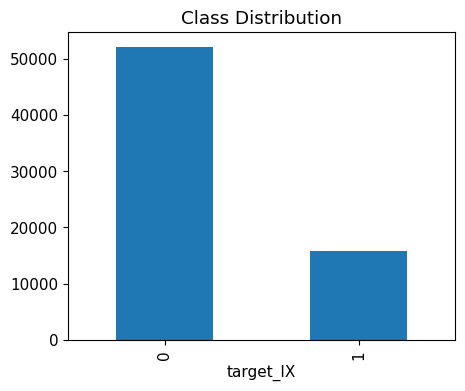

In [7]:
# Set the font size for the plot
plt.rcParams.update({'font.size': 11})

# 2019 and 2020 combined
plt.figure(figsize=(5, 4))
ax = df['target_IX'].value_counts().plot.bar()
ax.set_title('Class Distribution')

In [8]:
# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [10]:
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

([<matplotlib.axis.XTick at 0x79e50dda4bb0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

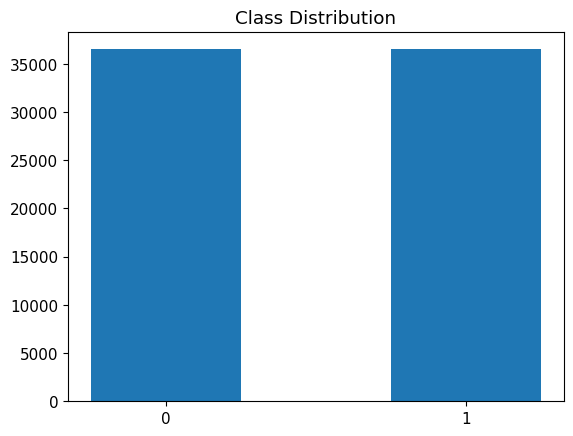

In [11]:
#search unique labels
lebels = list(np.unique(y_train_sm))

#count occurrences of each unique label
lebel_count = list(np.unique(y_train_sm, return_counts=True)[1])

# label frequency
plt.bar(lebels, lebel_count, width = 0.5)
plt.title('Class Distribution')

import math
new_list = range(math.floor(min(lebels)), math.ceil(max(lebels))+1)
plt.xticks(new_list)

In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.5f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

# Logistic Regression without hyperparameter tuning

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

# Assume you have already split your PCA-transformed data into X_train_pca, X_test_pca, and y_train, y_test

# Create a logistic regression model
model = LogisticRegression(random_state=42,solver='liblinear')

# Train the model on the training data
model.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=42, solver='liblinear')

### Calculating performance metrics with different thresholds

In [15]:
y_probabilities = model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3707,9917,5732,1051,13624,6783,0.667614,0.392732,0.779109,0.522223,0.706412,0.357483,0.633715,0.706412,0.350101
1,0.45,3474,10739,4910,1284,14213,6194,0.696477,0.414361,0.730139,0.528687,0.708190,0.365460,0.686242,0.708190,0.357861
2,0.50,3176,11490,4159,1582,14666,5741,0.718675,0.432993,0.667507,0.525263,0.700870,0.366548,0.734232,0.700870,0.354021
3,0.55,2850,12227,3422,1908,15077,5330,0.738815,0.454401,0.598991,0.516772,0.690160,0.365679,0.781328,0.690160,0.348540
4,0.60,2494,12946,2703,2264,15440,4967,0.756603,0.479892,0.524170,0.501055,0.675722,0.362487,0.827273,0.675722,0.341090
5,0.65,2100,13603,2046,2658,15703,4704,0.769491,0.506512,0.441362,0.471698,0.655309,0.353805,0.869257,0.655309,0.326434
6,0.70,1656,14214,1435,3102,15870,4537,0.777674,0.535749,0.348045,0.421965,0.628173,0.338472,0.908301,0.628173,0.302349


### Calculating performance metrics without different thresholds

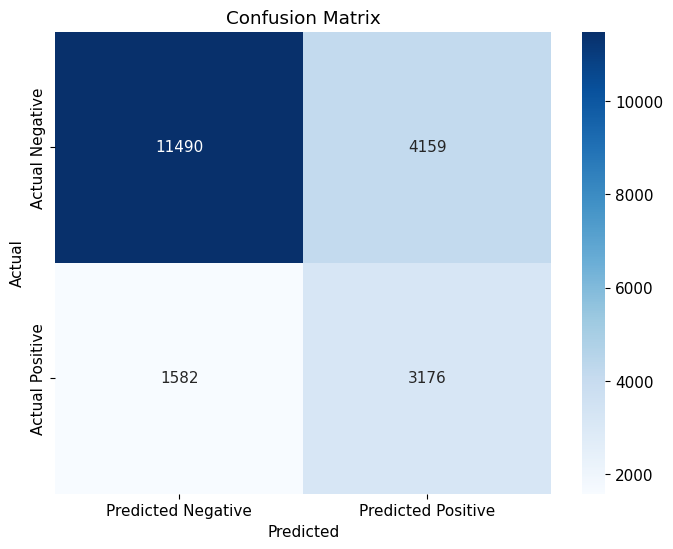

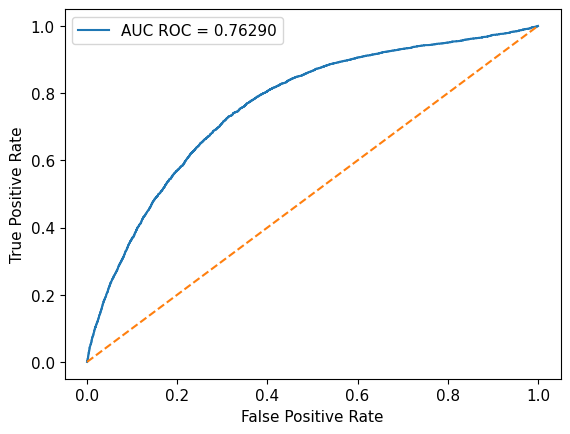

Accuracy: 0.718674964472975
Precision: 0.43299250170415815
Recall: 0.6675073560319462
F1 Score: 0.5252625485818242
AUC-ROC: 0.7628981606824426
pr_auc 0.4809858470125452


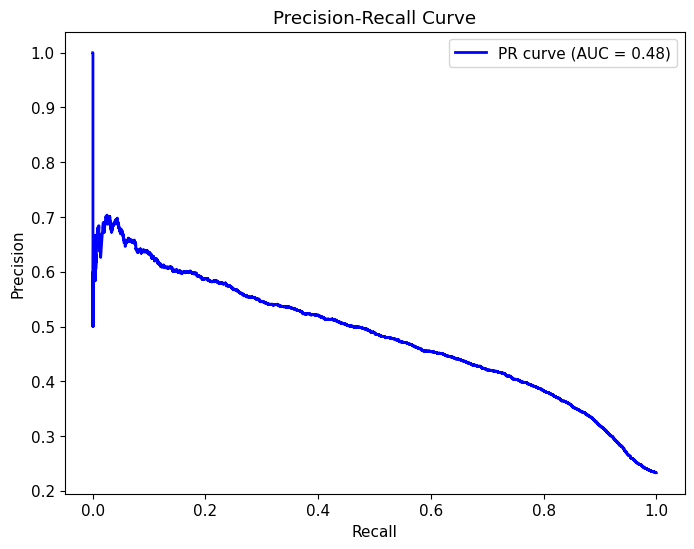

Max F1 Score: 0.5288424902842338
Threshold for Max F1 Score: 0.4509339059522087
ROC-AUC for Max F1 Threshold: 0.7082492422366442


In [16]:
evaluate_classification_model(model, X_test, y_test)

In [17]:
# Predict on the training set
y_train_pred = model.predict (X_train_sm)
# Predict on the testing set
y_test_pred = model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.71
Testing Accuracy:  0.718675


In [18]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# Extract feature importances
feature_importance = model.coef_[0]

# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importance))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
III: 5.4875
XVII: 2.9416
II: 2.5988
V: -2.5918
imp_mdc: -2.5754
X: -2.1679
agegrp: -2.1440
VII: -1.9887
XX: -1.9530
enrolid: 1.9442
emer_visits: 1.8225
XI: 1.5763
XIII: 1.2770
XV: -1.1869
longstay: -0.9968
XII: -0.9490
non_mdc: -0.9322
XIV: -0.8868
IV: -0.8256
VI: -0.7956
thergrp_count: 0.7764
XXII: 0.7638
I: -0.7404
non_emer_visits: 0.6112
XVI: 0.5501
VIII: 0.5253
shortstay: -0.5028
age: -0.3898
XVIII: -0.3687
XIX: -0.2948
sex: 0.2553
mediumstay: -0.1623
XXI: 0.0000


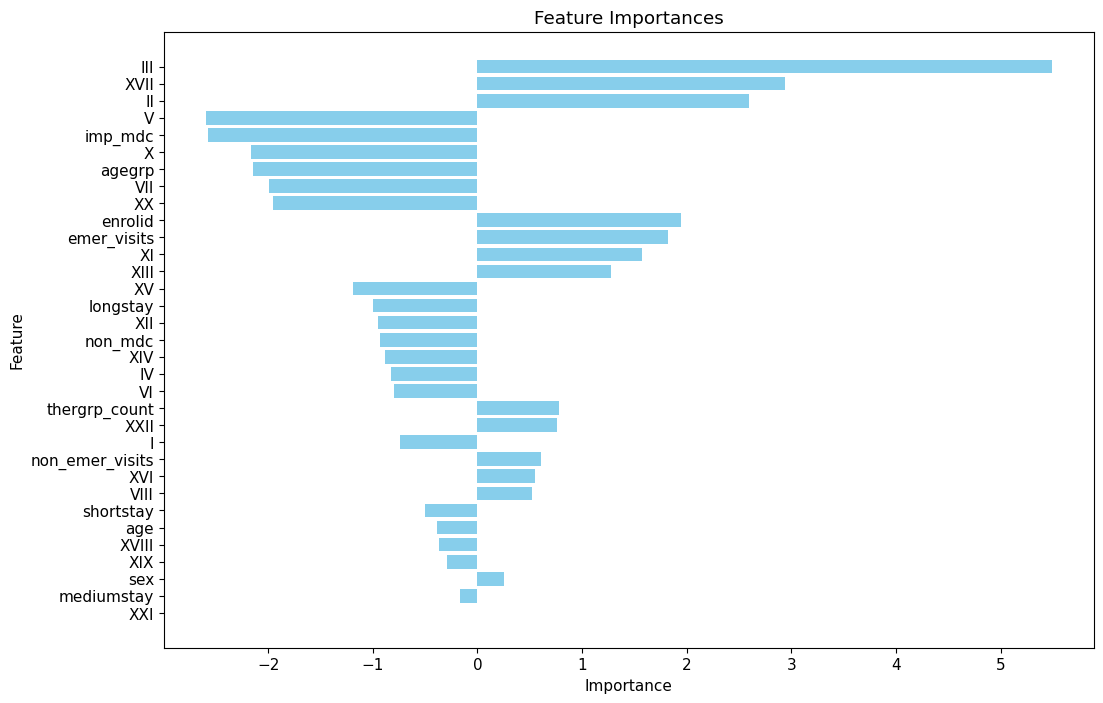

In [ ]:
import matplotlib.pyplot as plt

# Provided feature importances
feature_importances = {
    'III': 5.4875,
    'XVII': 2.9416,
    'II': 2.5988,
    'V': -2.5918,
    'imp_mdc': -2.5754,
    'X': -2.1679,
    'agegrp': -2.1440,
    'VII': -1.9887,
    'XX': -1.9530,
    'enrolid': 1.9442,
    'emer_visits': 1.8225,
    'XI': 1.5763,
    'XIII': 1.2770,
    'XV': -1.1869,
    'longstay': -0.9968,
    'XII': -0.9490,
    'non_mdc': -0.9322,
    'XIV': -0.8868,
    'IV': -0.8256,
    'VI': -0.7956,
    'thergrp_count': 0.7764,
    'XXII': 0.7638,
    'I': -0.7404,
    'non_emer_visits': 0.6112,
    'XVI': 0.5501,
    'VIII': 0.5253,
    'shortstay': -0.5028,
    'age': -0.3898,
    'XVIII': -0.3687,
    'XIX': -0.2948,
    'sex': 0.2553,
    'mediumstay': -0.1623,
    'XXI': 0.0000
}

# Sort feature importances by absolute value
sorted_importances = sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract feature names and importances
features = [x[0] for x in sorted_importances]
importances = [x[1] for x in sorted_importances]

# Plot
plt.figure(figsize=(12, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


## logistic regression using hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Instantiate a logistic regression model
logreg = LogisticRegression()

# Define the hyperparameters to search over
hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'solver': ['liblinear', 'saga']}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(logreg, hyperparameters, scoring='roc_auc', cv=5)
gridsearch.fit(X_train_sm, y_train_sm)
best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
#Best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Train the model with the best hyperparameters on the full training set

# from sklearn.linear_model import LogisticRegression

# Train the model with the best hyperparameters on the full training set
logreg = LogisticRegression(C=100, penalty='l2', solver='liblinear')
logreg.fit(X_train_sm, y_train_sm)


LogisticRegression(C=100, solver='liblinear')

In [ ]:
y_probabilities = logreg.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3684,9964,5685,1074,13648,6759,0.668790,0.393212,0.774275,0.521554,0.705496,0.357083,0.636718,0.705496,0.348737
1,0.45,3436,10787,4862,1322,14223,6184,0.696967,0.414076,0.722152,0.526348,0.705731,0.363807,0.689309,0.705731,0.354196
2,0.50,3156,11536,4113,1602,14692,5715,0.719949,0.434173,0.663304,0.524819,0.700238,0.366491,0.737172,0.700238,0.353614
3,0.55,2826,12258,3391,1932,15084,5323,0.739158,0.454560,0.593947,0.514989,0.688628,0.364658,0.783309,0.688628,0.346585
4,0.60,2478,12971,2678,2280,15449,4958,0.757044,0.480605,0.520807,0.499899,0.674839,0.362029,0.828871,0.674839,0.340266
5,0.65,2072,13628,2021,2686,15700,4707,0.769344,0.506230,0.435477,0.468196,0.653166,0.352073,0.870854,0.653166,0.323479
6,0.70,1640,14225,1424,3118,15865,4542,0.777429,0.535248,0.344683,0.419330,0.626843,0.337281,0.909004,0.626843,0.300294


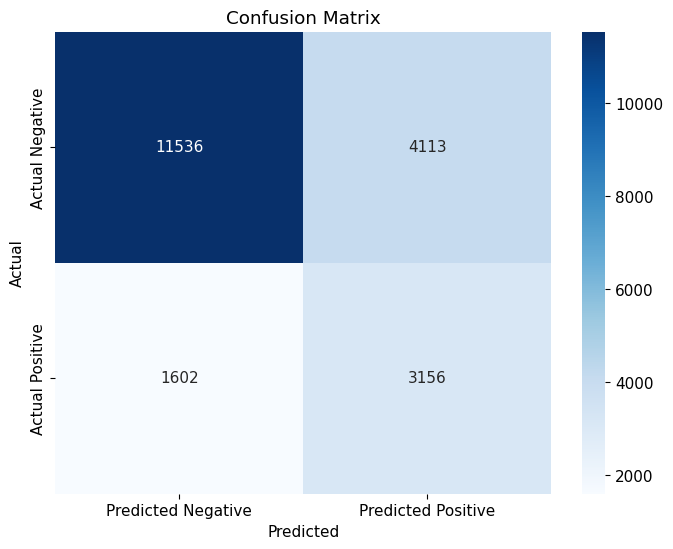

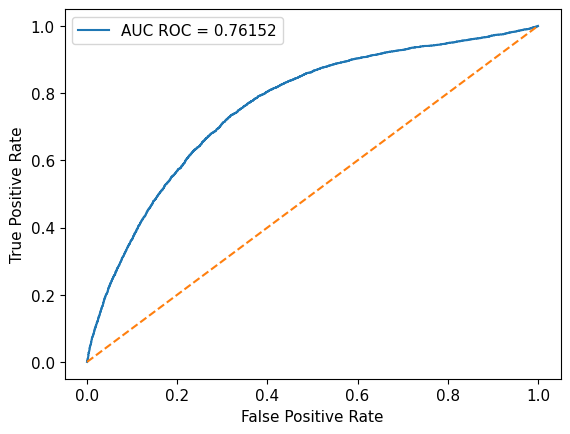

Accuracy: 0.7199490370951144
Precision: 0.43417251341312424
Recall: 0.6633039092055486
F1 Score: 0.5248191568969819
AUC-ROC: 0.761522404151326
pr_auc 0.48046057015331267


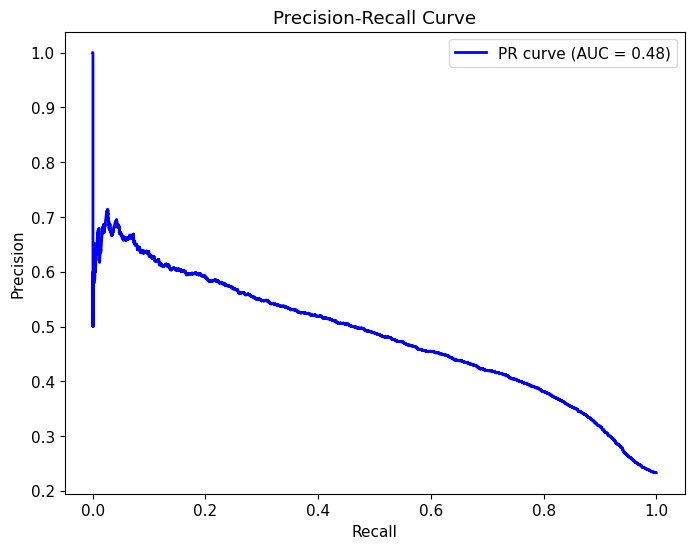

Max F1 Score: 0.5274609050389061
Threshold for Max F1 Score: 0.44170857262613417
ROC-AUC for Max F1 Threshold: 0.7074846159460062


In [ ]:
evaluate_classification_model(logreg, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = logreg.predict (X_train_sm)
# Predict on the testing set
y_test_pred = logreg.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.71
Testing Accuracy:  0.719949


In [ ]:
# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
III: 5.7896
XVII: 3.1517
V: -2.9627
II: 2.8397
imp_mdc: -2.7427
VII: -2.4843
X: -2.3726
agegrp: -2.2652
emer_visits: 2.1960
XX: -2.0432
enrolid: 1.9741
XI: 1.7101
XV: -1.4896
XIII: 1.3094
non_mdc: -1.1560
longstay: -1.0776
XII: -0.9998
VI: -0.8754
XIV: -0.8332
I: -0.8102
XXII: 0.7690
thergrp_count: 0.7620
IV: -0.7478
XVI: 0.7095
non_emer_visits: 0.6212
shortstay: -0.5629
VIII: 0.4706
XVIII: -0.3931
age: -0.3881
XIX: -0.2901
sex: 0.2326
mediumstay: -0.2195
XXI: 0.0000


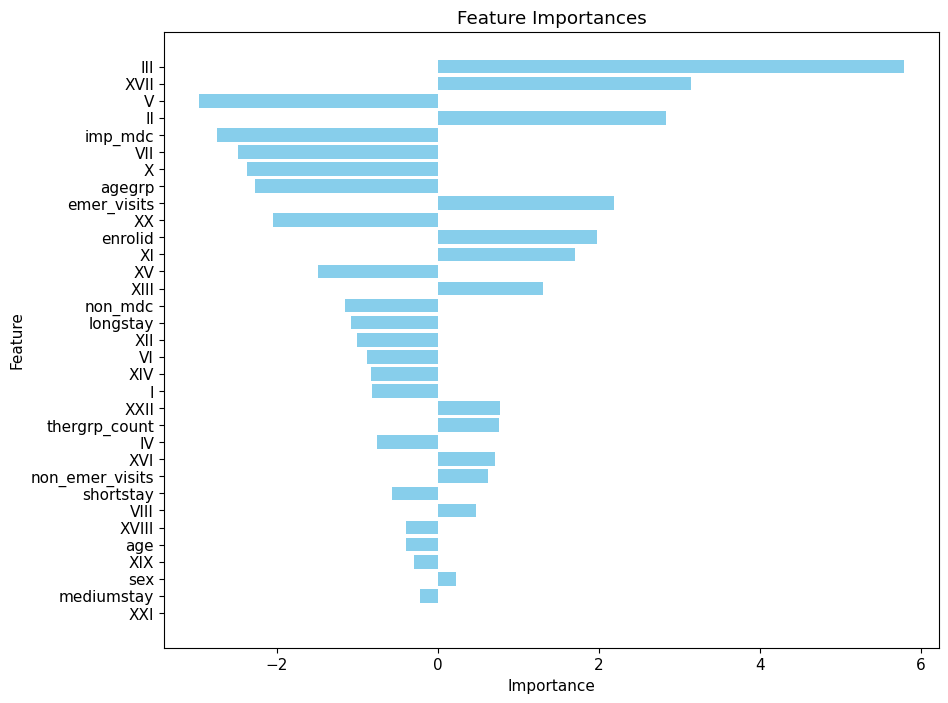

In [ ]:
import matplotlib.pyplot as plt

# Provided feature importances
feature_importances = {
    'III': 5.7896,
    'XVII': 3.1517,
    'V': -2.9627,
    'II': 2.8397,
    'imp_mdc': -2.7427,
    'VII': -2.4843,
    'X': -2.3726,
    'agegrp': -2.2652,
    'emer_visits': 2.1960,
    'XX': -2.0432,
    'enrolid': 1.9741,
    'XI': 1.7101,
    'XV': -1.4896,
    'XIII': 1.3094,
    'non_mdc': -1.1560,
    'longstay': -1.0776,
    'XII': -0.9998,
    'VI': -0.8754,
    'XIV': -0.8332,
    'I': -0.8102,
    'XXII': 0.7690,
    'thergrp_count': 0.7620,
    'IV': -0.7478,
    'XVI': 0.7095,
    'non_emer_visits': 0.6212,
    'shortstay': -0.5629,
    'VIII': 0.4706,
    'XVIII': -0.3931,
    'age': -0.3881,
    'XIX': -0.2901,
    'sex': 0.2326,
    'mediumstay': -0.2195,
    'XXI': 0.0000
}

# Sort feature importances by absolute value
sorted_importances = sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract feature names and importances
features = [x[0] for x in sorted_importances]
importances = [x[1] for x in sorted_importances]

# Plot
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to your data
rf_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [ ]:
y_probabilities = rf_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4316,4069,11580,442,8385,12022,0.410888,0.271515,0.907104,0.417934,0.583560,0.267951,0.260017,0.583560,0.170296
1,0.45,4089,5185,10464,669,9274,11133,0.454452,0.280973,0.859395,0.423489,0.595363,0.274250,0.331331,0.595363,0.178304
2,0.50,3823,6399,9250,935,10222,10185,0.500907,0.292435,0.803489,0.428804,0.606198,0.280786,0.408908,0.606198,0.187174
3,0.55,3470,7615,8034,1288,11085,9322,0.543196,0.301634,0.729298,0.426762,0.607955,0.283097,0.486613,0.607955,0.184093
4,0.60,3070,8864,6785,1688,11934,8473,0.584799,0.311517,0.645229,0.420174,0.605828,0.283717,0.566426,0.605828,0.179097
5,0.65,2607,10229,5420,2151,12836,7571,0.629000,0.324779,0.547919,0.407822,0.600786,0.283358,0.653652,0.600786,0.174481
6,0.70,2147,11726,3923,2611,13873,6534,0.679816,0.353707,0.451240,0.396564,0.600277,0.287553,0.749313,0.600277,0.185507


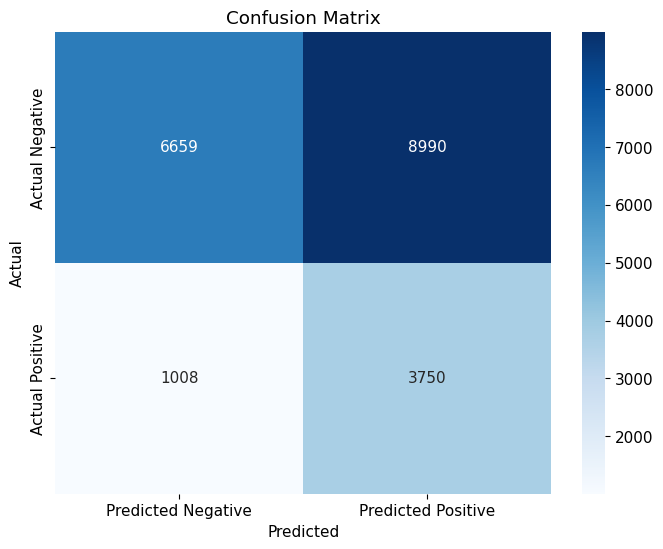

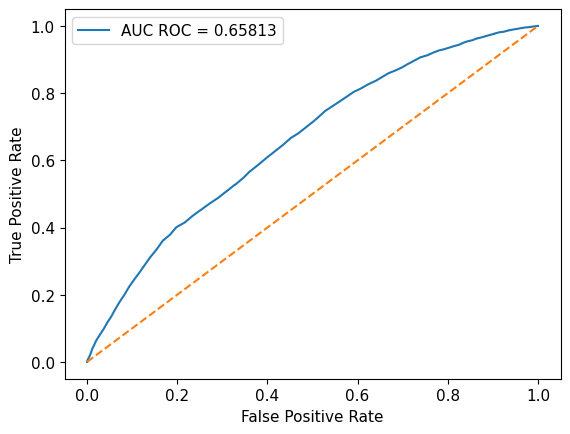

Accuracy: 0.5100700739942177
Precision: 0.2943485086342229
Recall: 0.7881462799495587
F1 Score: 0.4286204137615728
AUC-ROC: 0.6581310829138952
pr_auc 0.3573237724609247


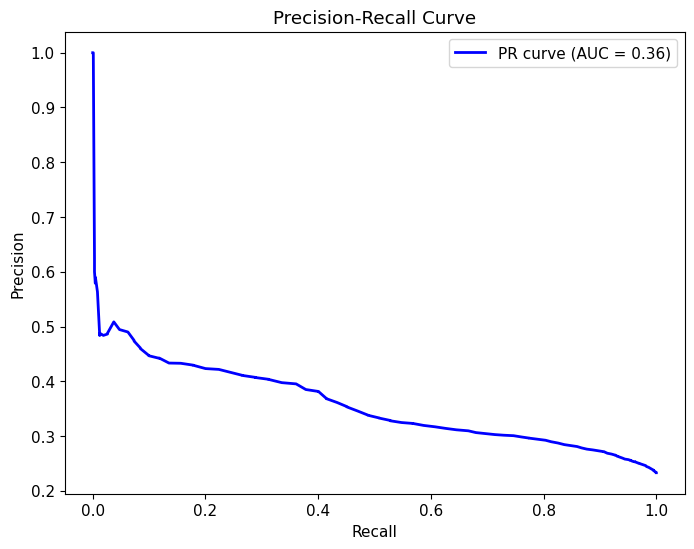

Max F1 Score: 0.428821435037113
Threshold for Max F1 Score: 0.54
ROC-AUC for Max F1 Threshold: 0.6094565372220467


In [ ]:
evaluate_classification_model(rf_model, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = rf_model.predict (X_train_sm)
# Predict on the testing set
y_test_pred = rf_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  1.00
Testing Accuracy:  0.510070


Feature Importance:
enrolid: 0.1251
III: 0.0839
emer_visits: 0.0789
XX: 0.0566
XVII: 0.0538
sex: 0.0483
XIV: 0.0471
non_mdc: 0.0467
IV: 0.0464
non_emer_visits: 0.0453
V: 0.0379
X: 0.0366
II: 0.0344
XIII: 0.0285
XII: 0.0260
longstay: 0.0258
XXII: 0.0252
VIII: 0.0233
agegrp: 0.0171
XVIII: 0.0154
thergrp_count: 0.0153
imp_mdc: 0.0149
shortstay: 0.0138
age: 0.0130
I: 0.0121
mediumstay: 0.0098
XI: 0.0082
XVI: 0.0034
VI: 0.0025
XIX: 0.0022
VII: 0.0017
XV: 0.0010
XXI: 0.0000


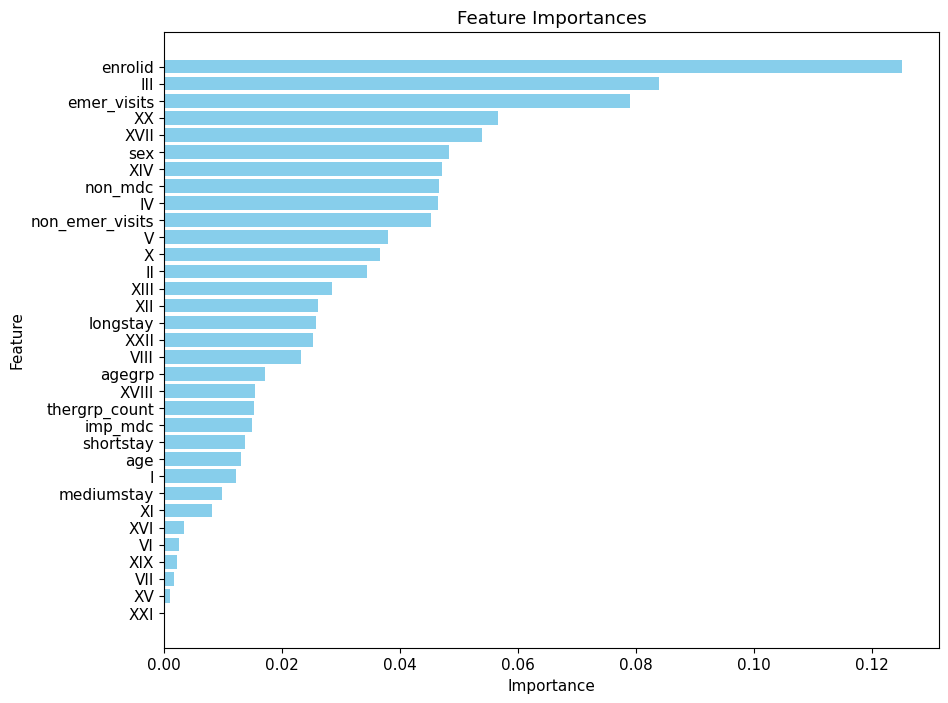

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Random Forest with hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'max_features':['sqrt', 'log2', None],
    'criterion':['gini', 'entropy', 'log_loss']
}
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="roc_auc")


grid_search.fit(X_train_sm, y_train_sm)
# took around 8363 seconds
#Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}
#Best score: 0.9235951642997708

In [ ]:
best_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, criterion='entropy',max_depth=20,max_features='sqrt',min_samples_leaf=5,n_estimators=200)
best_rf_model.fit(X_train_sm,y_train_sm)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
y_probabilities = best_rf_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4241,4893,10756,517,9134,11273,0.447592,0.282790,0.891341,0.429360,0.602006,0.277397,0.312672,0.602006,0.195439
1,0.45,4034,6393,9256,724,10427,9980,0.510952,0.303536,0.847835,0.447030,0.628180,0.292827,0.408525,0.628180,0.227454
2,0.50,3769,8112,7537,989,11881,8526,0.582202,0.333363,0.792140,0.469248,0.655256,0.312534,0.518372,0.655256,0.264140
3,0.55,3506,9227,6422,1252,12733,7674,0.623953,0.353143,0.736864,0.477462,0.663243,0.321570,0.589622,0.663243,0.276204
4,0.60,3173,10319,5330,1585,13492,6915,0.661146,0.373162,0.666877,0.478546,0.663140,0.326523,0.659403,0.663140,0.279842
5,0.65,2748,11429,4220,2010,14177,6230,0.694713,0.394374,0.577554,0.468702,0.653944,0.326268,0.730334,0.653944,0.274543
6,0.70,2283,12462,3187,2475,14745,5662,0.722546,0.417367,0.479823,0.446422,0.638084,0.321545,0.796345,0.638084,0.263636


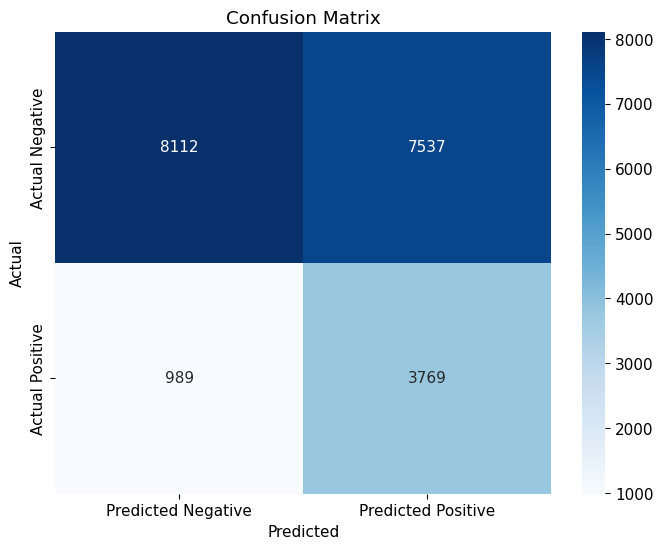

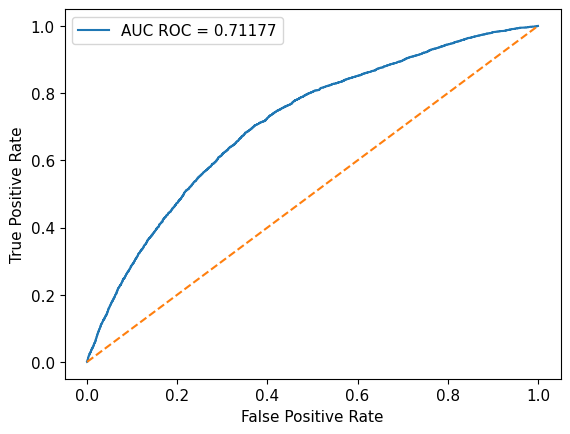

Accuracy: 0.5822021855245749
Precision: 0.3333628162037856
Recall: 0.7921395544346364
F1 Score: 0.4692480079681275
AUC-ROC: 0.7117736748619777
pr_auc 0.4079347561714117


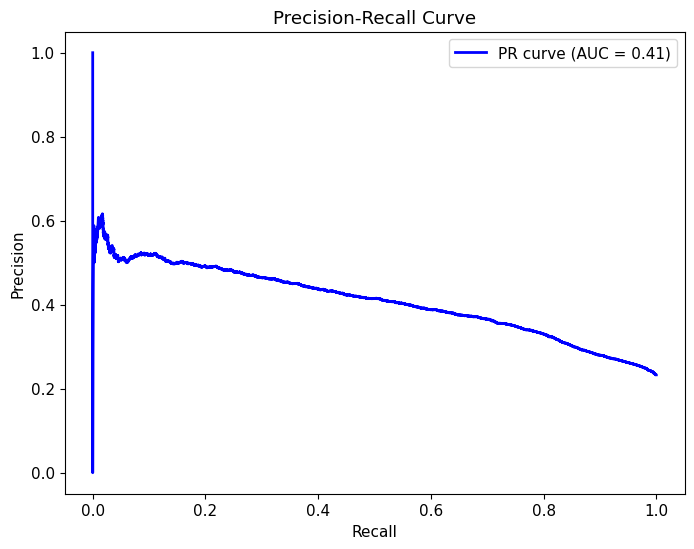

Max F1 Score: 0.4811306792955453
Threshold for Max F1 Score: 0.591108630987122
ROC-AUC for Max F1 Threshold: 0.6657453075992887


In [ ]:
evaluate_classification_model(best_rf_model, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = best_rf_model.predict (X_train_sm)
# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.93
Testing Accuracy:  0.582202


Feature Importance:
enrolid: 0.1264
III: 0.1081
XVII: 0.0619
XX: 0.0604
sex: 0.0580
non_emer_visits: 0.0468
non_mdc: 0.0468
IV: 0.0455
V: 0.0453
emer_visits: 0.0448
II: 0.0430
X: 0.0425
XIV: 0.0419
XXII: 0.0309
longstay: 0.0294
XIII: 0.0284
VIII: 0.0228
XII: 0.0213
thergrp_count: 0.0159
agegrp: 0.0139
imp_mdc: 0.0122
XVIII: 0.0115
age: 0.0103
shortstay: 0.0095
I: 0.0077
mediumstay: 0.0060
XI: 0.0052
XVI: 0.0012
VI: 0.0007
XIX: 0.0007
XV: 0.0005
VII: 0.0003
XXI: 0.0000


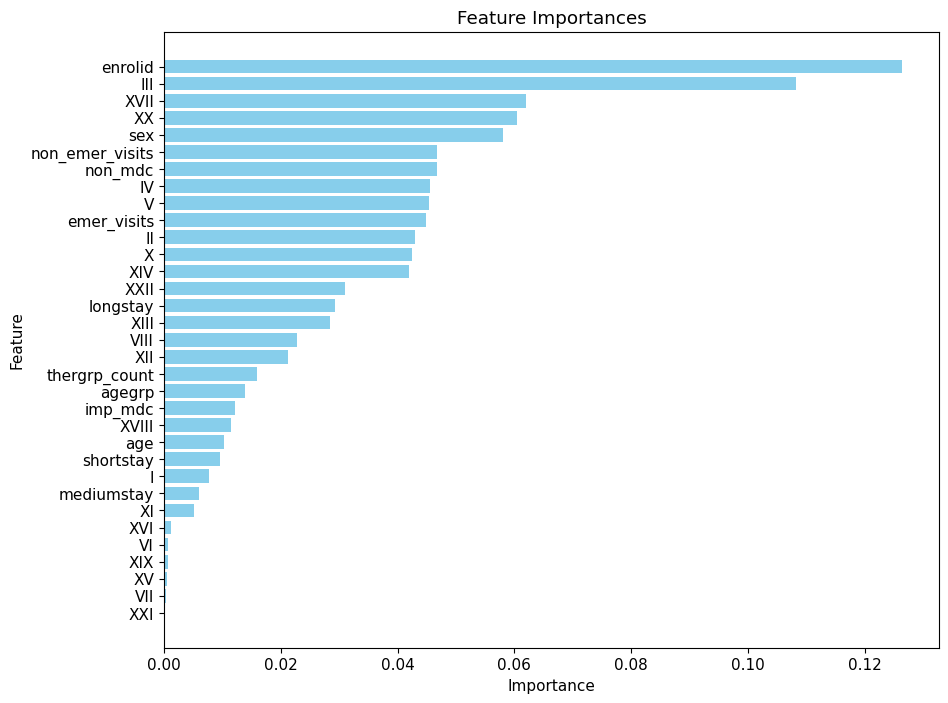

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train_sm, y_train_sm)

GaussianNB()

In [ ]:
y_probabilities = gnb.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3625,9790,5859,1133,13415,6992,0.657372,0.382223,0.761875,0.509058,0.693737,0.346726,0.625599,0.693737,0.328497
1,0.45,3573,9953,5696,1185,13526,6881,0.662812,0.385478,0.750946,0.509446,0.693480,0.347542,0.636015,0.693480,0.328626
2,0.50,3527,10086,5563,1231,13613,6794,0.667075,0.388009,0.741278,0.509388,0.692896,0.347945,0.644514,0.692896,0.328217
3,0.55,3477,10234,5415,1281,13711,6696,0.671877,0.391026,0.730769,0.509451,0.692370,0.348522,0.653971,0.692370,0.328089
4,0.60,3424,10383,5266,1334,13807,6600,0.676582,0.394016,0.719630,0.509221,0.691561,0.348916,0.663493,0.691561,0.327624
5,0.65,3376,10549,5100,1382,13925,6482,0.682364,0.398301,0.709542,0.510201,0.691821,0.350333,0.674101,0.691821,0.329191
6,0.70,3308,10721,4928,1450,14029,6378,0.687460,0.401651,0.695250,0.509158,0.690171,0.350302,0.685092,0.690171,0.327799


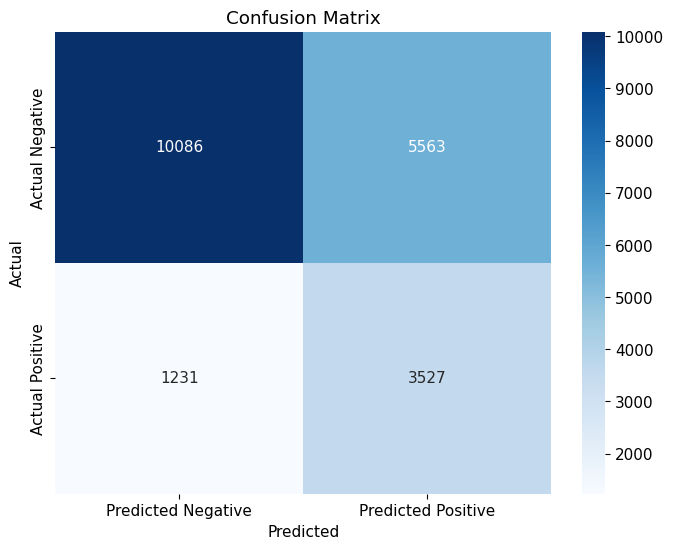

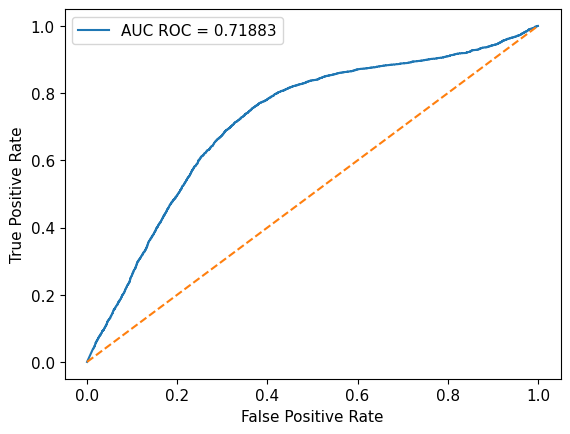

Accuracy: 0.6670750232763267
Precision: 0.388008800880088
Recall: 0.7412778478352249
F1 Score: 0.5093876372039283
AUC-ROC: 0.7188254679400085
pr_auc 0.40978326692048095


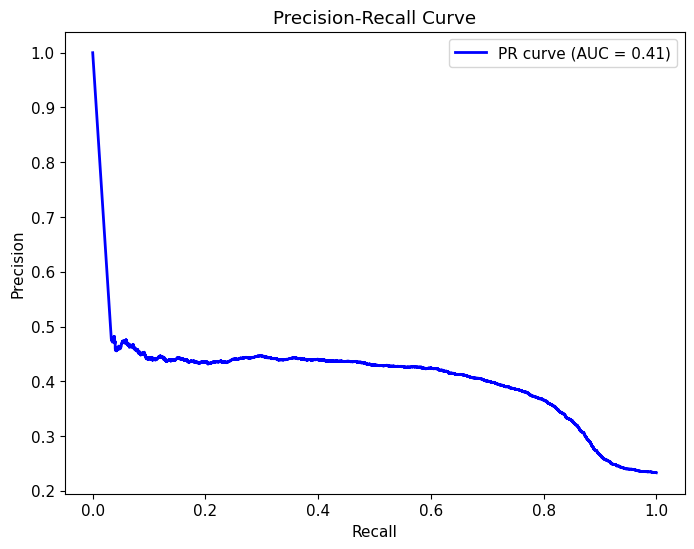

Max F1 Score: 0.5109137437904562
Threshold for Max F1 Score: 0.6406540165840205
ROC-AUC for Max F1 Threshold: 0.6926264225782658


In [ ]:
evaluate_classification_model(gnb, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = gnb.predict (X_train_sm)
# Predict on the testing set
y_test_pred = gnb.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.667075


In [ ]:
import numpy as np

# Get means for each feature in each class
class_means = gnb.theta_

# Calculate feature importance as the absolute values of class means
feature_importances = np.abs(class_means)

# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1].sum()), reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance.sum():.4f}")


Feature Importance:
age: 2.7828
enrolid: 2.1225


# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
# Create an XGBoost classifier with default hyperparameters
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model on the training data
xgb_classifier.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4653,1346,14303,105,5999,14408,0.293968,0.245463,0.977932,0.392426,0.531972,0.245192,0.086012,0.531972,0.105208
1,0.45,4636,1496,14153,122,6132,14275,0.300485,0.246740,0.974359,0.393766,0.534978,0.246392,0.095597,0.534978,0.109481
2,0.50,4614,1678,13971,144,6292,14115,0.308326,0.248265,0.969735,0.395322,0.538481,0.247807,0.107227,0.538481,0.114125
3,0.55,4601,1864,13785,157,6465,13942,0.316803,0.250245,0.967003,0.397598,0.543058,0.249681,0.119113,0.543058,0.121902
4,0.60,4588,2089,13560,170,6677,13730,0.327192,0.252810,0.964271,0.400594,0.548881,0.252108,0.133491,0.548881,0.131750
5,0.65,4557,2258,13391,201,6815,13592,0.333954,0.253900,0.957755,0.401392,0.551023,0.253024,0.144290,0.551023,0.132545
6,0.70,4518,2477,13172,240,6995,13412,0.342775,0.255399,0.949559,0.402530,0.553922,0.254277,0.158285,0.553922,0.134227


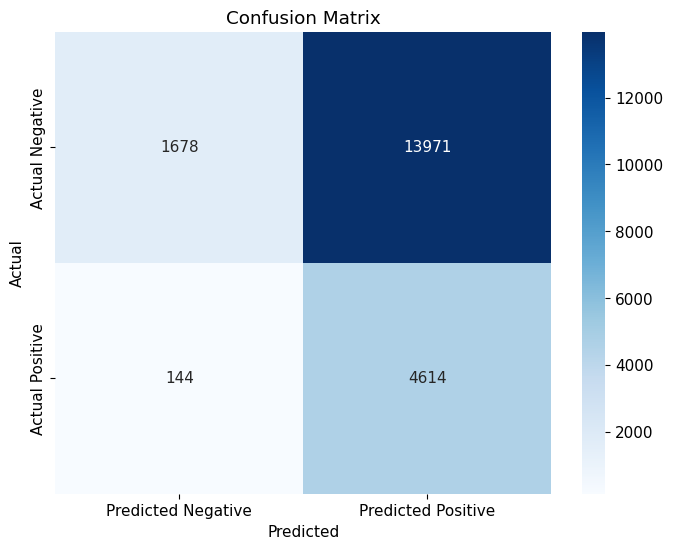

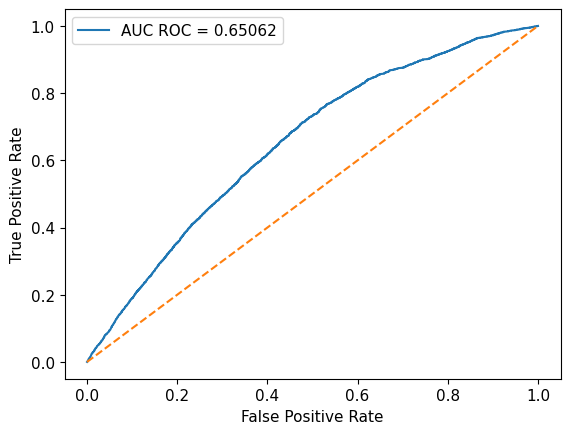

Accuracy: 0.3083255745577498
Precision: 0.24826472962066182
Recall: 0.969735182849937
F1 Score: 0.3953219380542346
AUC-ROC: 0.6506236164840548
pr_auc 0.3292963880185396


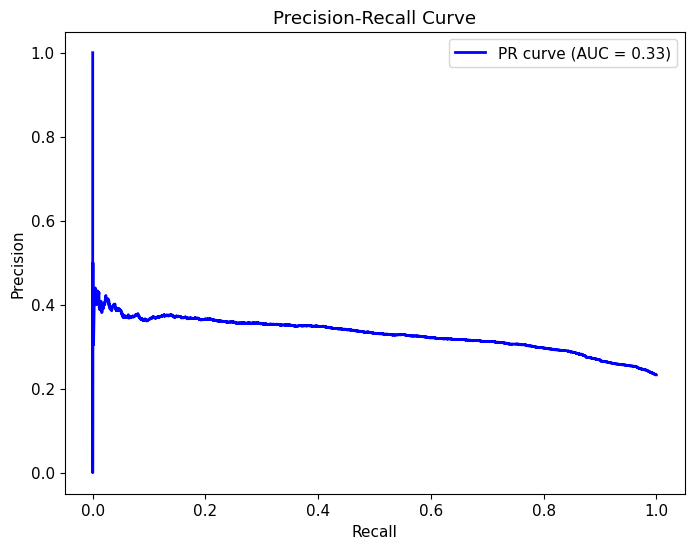

Max F1 Score: 0.43625926811767524
Threshold for Max F1 Score: 0.97440434
ROC-AUC for Max F1 Threshold: 0.6175865698786034


In [ ]:
evaluate_classification_model(xgb_classifier, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = xgb_classifier.predict (X_train_sm)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.88
Testing Accuracy:  0.308326


Feature Importance:
III: 0.1335
enrolid: 0.0914
XXII: 0.0896
XX: 0.0763
non_emer_visits: 0.0633
XIII: 0.0587
IV: 0.0571
V: 0.0522
II: 0.0520
XVII: 0.0354
non_mdc: 0.0299
XIV: 0.0279
longstay: 0.0240
thergrp_count: 0.0226
X: 0.0223
age: 0.0210
XII: 0.0191
agegrp: 0.0167
VIII: 0.0133
XVIII: 0.0122
XVI: 0.0097
emer_visits: 0.0089
XI: 0.0082
XV: 0.0078
I: 0.0073
imp_mdc: 0.0069
shortstay: 0.0068
mediumstay: 0.0058
VII: 0.0057
XIX: 0.0052
sex: 0.0047
VI: 0.0047
XXI: 0.0000


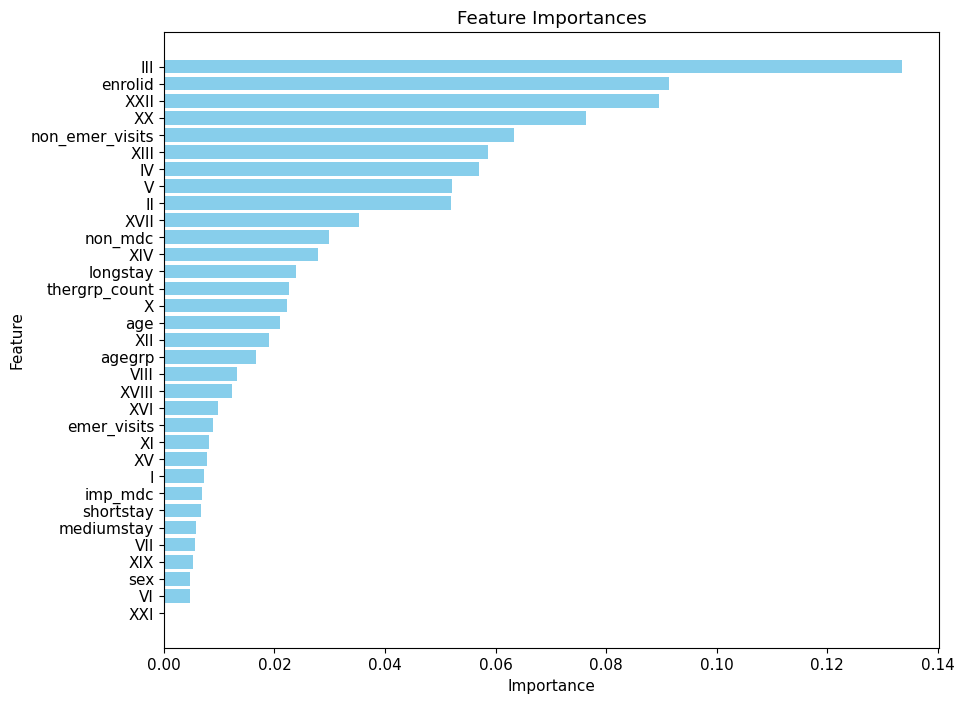

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# XGBoost hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of boosting rounds
    'max_depth': [3, 4, 5],           # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(xgb_classifier, param_grid, scoring='roc_auc', cv=5, verbose=2)
gridsearch.fit(X_train_sm, y_train_sm)

best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
#Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [ ]:
# Train the XGBoost model with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, max_depth=5, n_estimators=300, random_state=42)
best_xgb_classifier.fit(X_train_sm, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_probabilities = best_xgb_classifier.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4645,1569,14080,113,6214,14193,0.304503,0.248064,0.976251,0.395605,0.538256,0.247710,0.100262,0.538256,0.117642
1,0.45,4616,1766,13883,142,6382,14025,0.312736,0.249527,0.970156,0.396956,0.541503,0.249038,0.112851,0.541503,0.120560
2,0.50,4586,1996,13653,172,6582,13825,0.322536,0.251439,0.963850,0.398835,0.545699,0.250778,0.127548,0.545699,0.125419
3,0.55,4553,2225,13424,205,6778,13629,0.332141,0.253268,0.956915,0.400528,0.549548,0.252401,0.142182,0.549548,0.129375
4,0.60,4519,2442,13207,239,6961,13446,0.341108,0.254936,0.949769,0.401975,0.552909,0.253842,0.156048,0.552909,0.132452
5,0.65,4483,2696,12953,275,7179,13228,0.351791,0.257112,0.942203,0.403983,0.557241,0.255727,0.172279,0.557241,0.137252
6,0.70,4434,2955,12694,324,7389,13018,0.362082,0.258874,0.931904,0.405191,0.560367,0.257123,0.188830,0.560367,0.139015


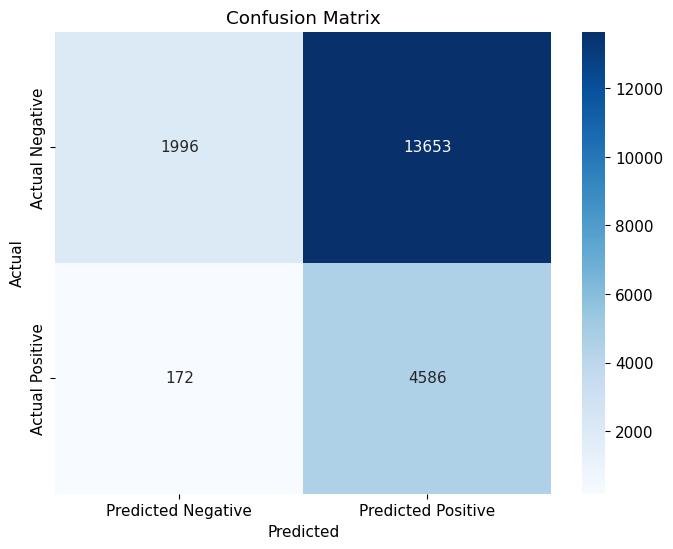

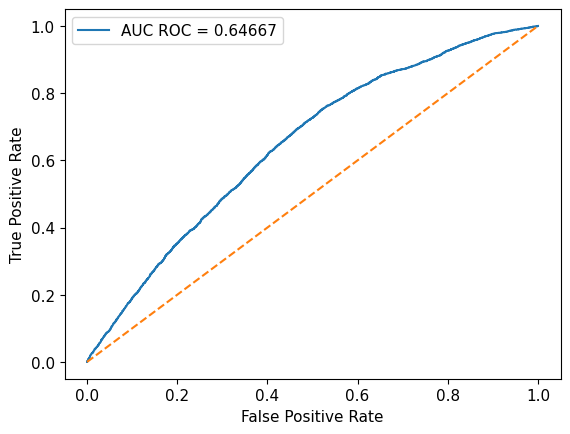

Accuracy: 0.3225363845739207
Precision: 0.251439223641647
Recall: 0.9638503572929803
F1 Score: 0.39883463060399177
AUC-ROC: 0.6466658855545592
pr_auc 0.3280933483441604


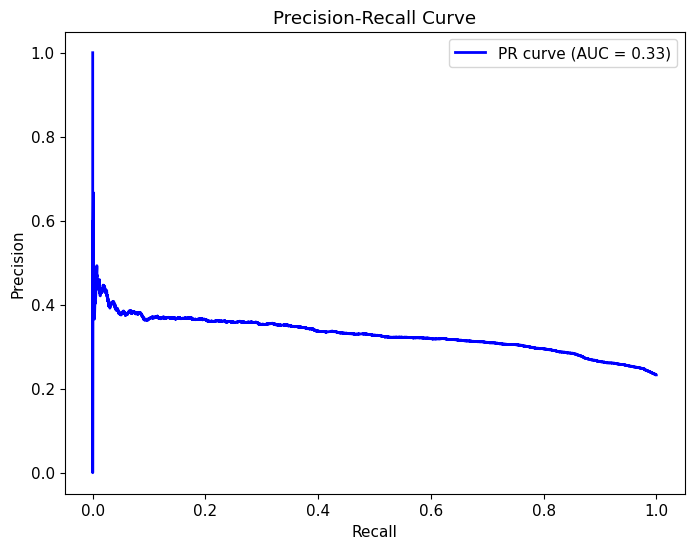

Max F1 Score: 0.4340288156872123
Threshold for Max F1 Score: 0.9492005
ROC-AUC for Max F1 Threshold: 0.6150240494157091


In [ ]:
evaluate_classification_model(best_xgb_classifier, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = best_xgb_classifier.predict (X_train_sm)
# Predict on the testing set
y_test_pred = best_xgb_classifier.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.87
Testing Accuracy:  0.322536


Feature Importance:
sex: 0.2676
III: 0.0954
enrolid: 0.0677
XX: 0.0575
XXII: 0.0540
II: 0.0516
XIII: 0.0457
non_emer_visits: 0.0408
IV: 0.0384
V: 0.0367
XVII: 0.0312
XIV: 0.0216
non_mdc: 0.0214
thergrp_count: 0.0196
X: 0.0187
longstay: 0.0181
VIII: 0.0174
age: 0.0167
agegrp: 0.0134
XII: 0.0121
XVIII: 0.0091
emer_visits: 0.0061
shortstay: 0.0059
XI: 0.0051
I: 0.0050
XVI: 0.0048
imp_mdc: 0.0040
XV: 0.0032
VII: 0.0030
mediumstay: 0.0029
XIX: 0.0026
VI: 0.0025
XXI: 0.0000


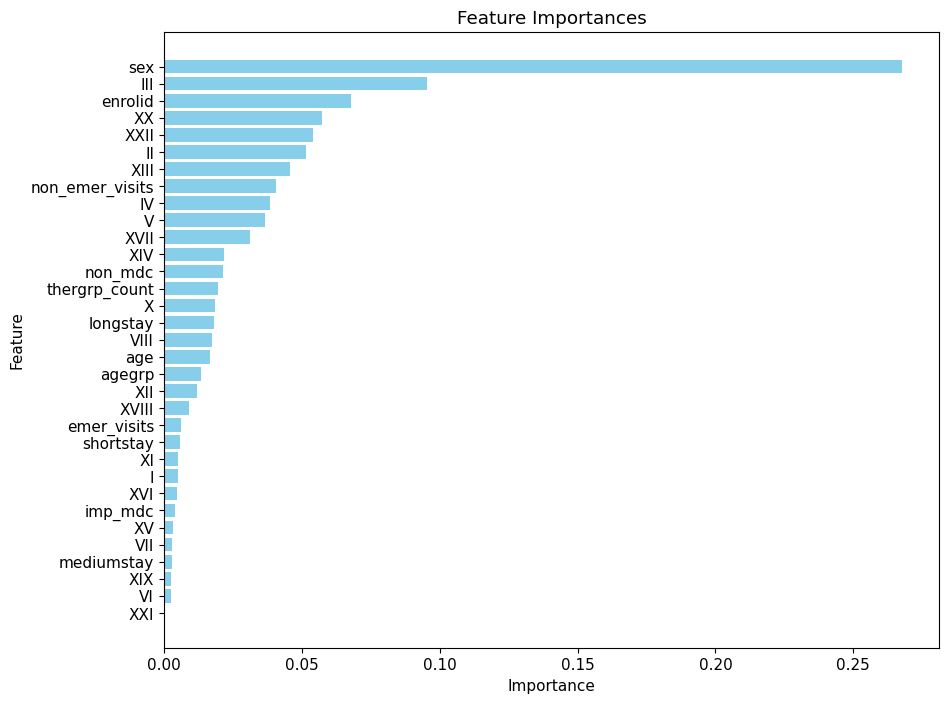

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_xgb_classifier.feature_importances_

# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42,probability=True)

# Train the SVM model on the training data
svm_classifier.fit(X_train_sm, y_train_sm)
#2253 seconds

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
y_probabilities = svm_classifier.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3693,10045,5604,1065,13738,6669,0.673200,0.397225,0.776166,0.525507,0.709030,0.360501,0.641894,0.709030,0.354949
1,0.45,3479,10769,4880,1279,14248,6159,0.698192,0.416198,0.731190,0.530457,0.709674,0.366994,0.688159,0.709674,0.360575
2,0.50,3278,11324,4325,1480,14602,5805,0.715539,0.431146,0.688945,0.530378,0.706285,0.369560,0.723625,0.706285,0.360817
3,0.55,2984,11980,3669,1774,14964,5443,0.733278,0.448519,0.627154,0.523004,0.696349,0.368222,0.765544,0.696349,0.354235
4,0.60,2655,12604,3045,2103,15259,5148,0.747734,0.465789,0.558008,0.507745,0.681713,0.362967,0.805419,0.681713,0.342509
5,0.65,2290,13268,2381,2468,15558,4849,0.762385,0.490259,0.481295,0.485735,0.664572,0.356898,0.847850,0.664572,0.331276
6,0.70,1810,13969,1680,2948,15779,4628,0.773215,0.518625,0.380412,0.438894,0.636528,0.341751,0.892645,0.636528,0.306644


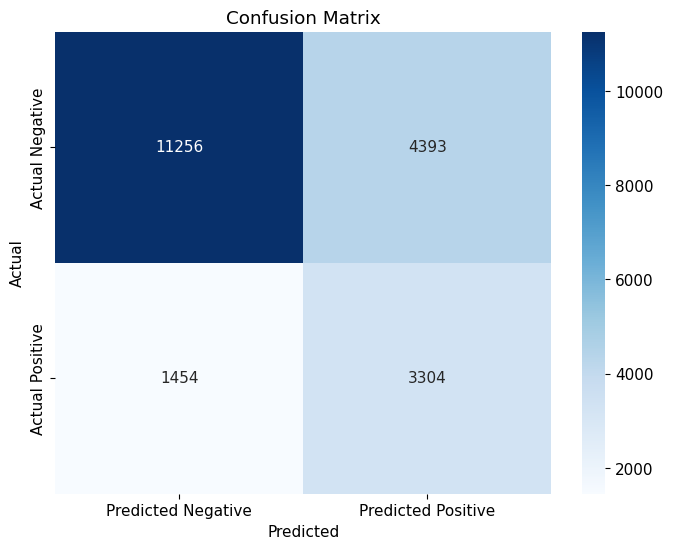

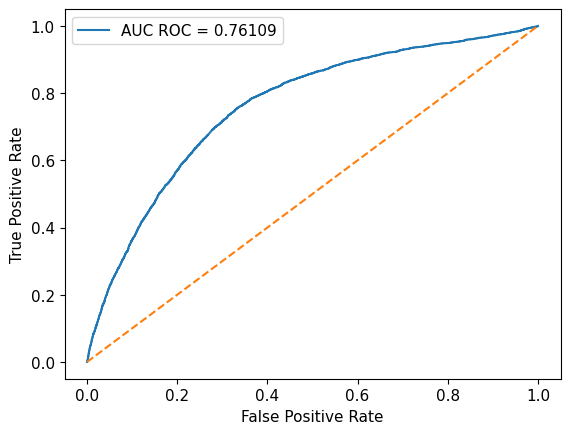

Accuracy: 0.7134806683980986
Precision: 0.42925815252695854
Recall: 0.6944094157208911
F1 Score: 0.5305499799277398
AUC-ROC: 0.7610926783337633
pr_auc 0.4778268923243276


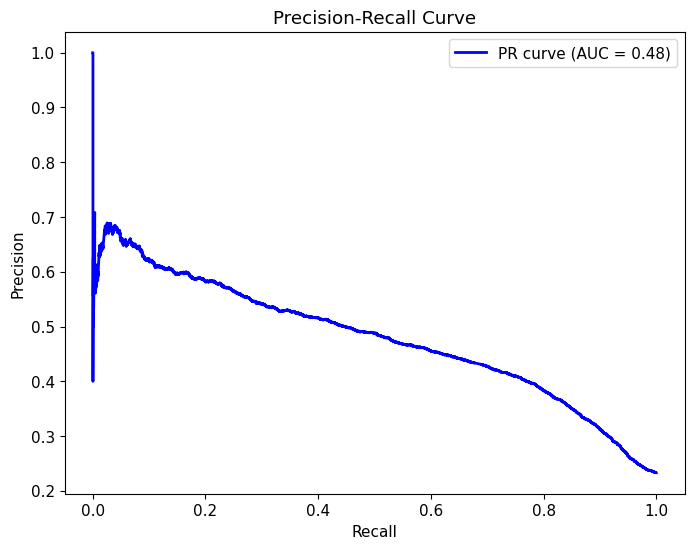

Max F1 Score: 0.5311874449515573
Threshold for Max F1 Score: 0.4866623444318286
ROC-AUC for Max F1 Threshold: 0.7075394522722639


In [ ]:
evaluate_classification_model(svm_classifier, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = svm_classifier.predict(X_train_sm)
# Predict on the testing set
y_test_pred = svm_classifier.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.71
Testing Accuracy:  0.713481


Feature Coefficients:
III: 4.6824
II: 2.3148
V: -2.0665
XVII: 2.0390
imp_mdc: -1.8316
enrolid: 1.7921
VII: -1.7141
XI: 1.4223
emer_visits: 1.4145
X: -1.4107
agegrp: -1.3667
IV: -1.1617
XIV: -1.0678
XX: -1.0048
non_mdc: -0.8854
VI: -0.7890
XV: -0.7263
longstay: -0.7035
thergrp_count: 0.7026
XIII: 0.5421
shortstay: -0.5323
XXII: 0.4998
sex: 0.4861
XII: -0.4189
I: -0.4153
non_emer_visits: 0.3861
XVI: 0.3650
XVIII: -0.3607
VIII: 0.2576
XIX: -0.2233
age: -0.2228
mediumstay: -0.2093
XXI: 0.0000


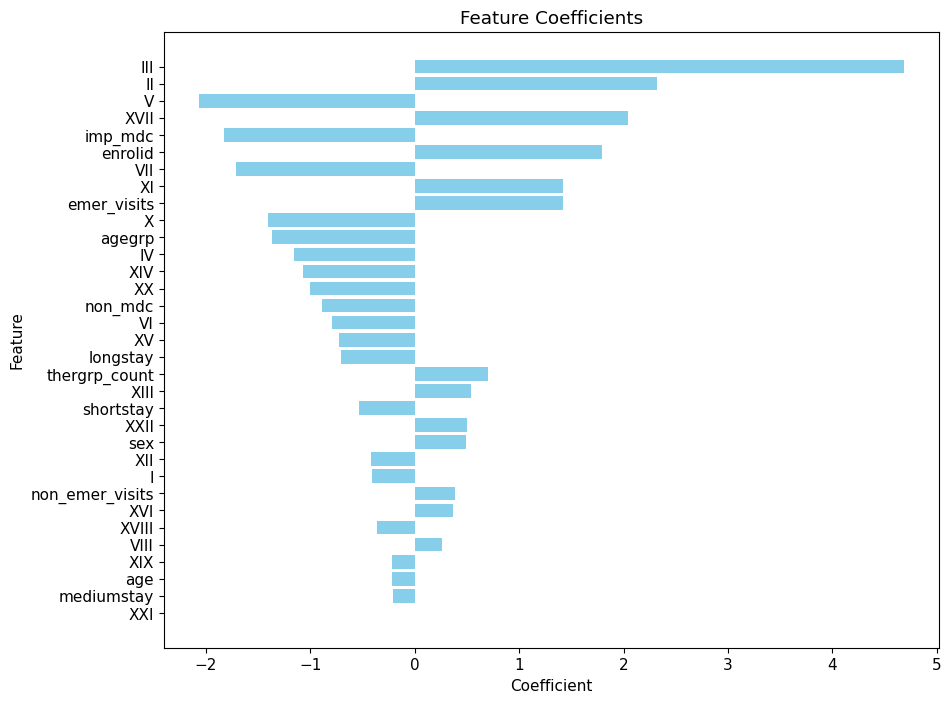

In [ ]:
import matplotlib.pyplot as plt

# Get feature coefficients (weights)
feature_coefficients = svm_classifier.coef_[0]

# Pair feature names with their respective coefficients
feature_coefficient_dict = dict(zip(df.columns, feature_coefficients))

# Sort feature coefficients in descending order
sorted_feature_coefficient = sorted(feature_coefficient_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature coefficients
print("Feature Coefficients:")
for feature, coefficient in sorted_feature_coefficient:
    print(f"{feature}: {coefficient:.4f}")

# Plot feature coefficients
plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_feature_coefficient], [x[1] for x in sorted_feature_coefficient], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.gca().invert_yaxis()
plt.show()


# SVM with hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svm_classifier = SVC(random_state=42,probability=True)
# # Define the hyperparameters to search over
# hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
#                    'C': [0.1, 1, 10, 100, 1000],
#                    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
#                    'degree':[0,1,2,3,4]}
# randomsearch = RandomizedSearchCV(svm_classifier, hyperparameters,cv=5,n_iter=2)
# randomsearch.fit(X_train_sm, y_train_sm)
# best_params = randomsearch.best_params_
# print(f"Best hyperparameters: {best_params}")
# pd.DataFrame(randomsearch.cv_results_)[['param_kernel','param_C','param_gamma','param_degree','mean_test_score']]
# # Best hyperparameters: {'kernel': 'linear', 'gamma': 0.0001, 'degree': 0, 'C': 10}
# # 17803 seconds

NameError: name 'SVC' is not defined

In [ ]:
svm_classifier_best = SVC(random_state=42,probability=True,kernel='linear',C=10,gamma=0.0001,degree=0)
svm_classifier_best.fit(X_train_sm, y_train_sm)

NameError: name 'SVC' is not defined

In [ ]:
y_probabilities = svm_classifier_best.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3827,9396,6253,931,13223,7184,0.647964,0.379663,0.804330,0.515838,0.702376,0.350996,0.600422,0.702376,0.342315
1,0.45,3658,10031,5618,1100,13689,6718,0.670799,0.394351,0.768810,0.521305,0.704905,0.357084,0.640999,0.704905,0.348009
2,0.50,3498,10587,5062,1260,14085,6322,0.690204,0.408645,0.735183,0.525304,0.705856,0.362172,0.676529,0.705856,0.352783
3,0.55,3233,11263,4386,1525,14496,5911,0.710344,0.424334,0.679487,0.522421,0.699607,0.363059,0.719727,0.699607,0.348988
4,0.60,2995,11767,3882,1763,14762,5645,0.723379,0.435510,0.629466,0.514826,0.690700,0.360531,0.751933,0.690700,0.341183
5,0.65,2645,12414,3235,2113,15059,5348,0.737933,0.449830,0.555906,0.497274,0.674592,0.353606,0.793278,0.674592,0.326011
6,0.70,2241,13119,2530,2517,15360,5047,0.752683,0.469713,0.470996,0.470354,0.654662,0.344573,0.838328,0.654662,0.309031


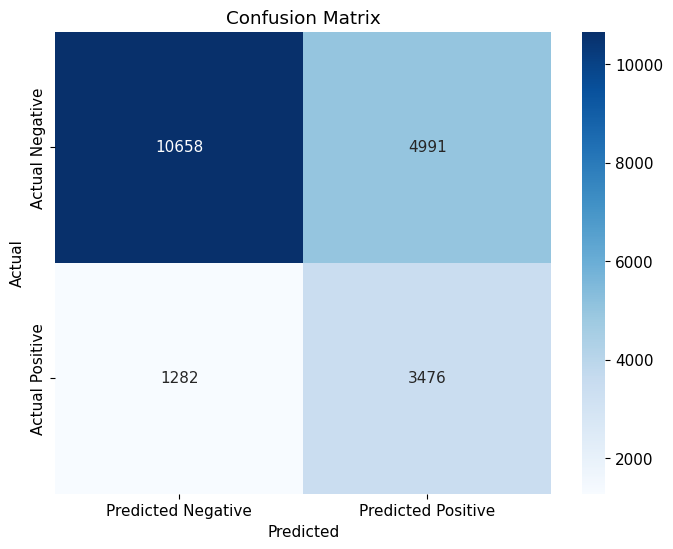

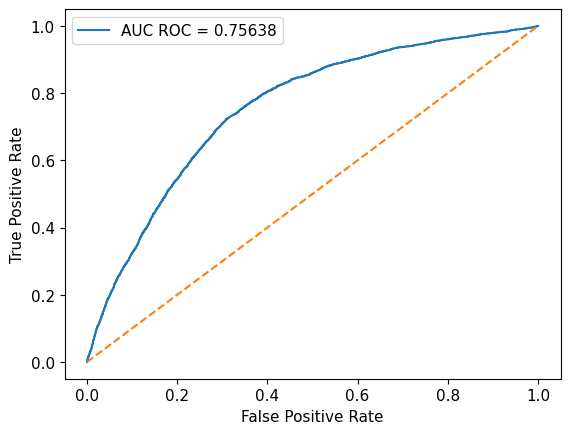

Accuracy: 0.6926054785122752
Precision: 0.4105350183063659
Recall: 0.7305590584279109
F1 Score: 0.5256710775047259
AUC-ROC: 0.7563804409205938
pr_auc 0.455759400902136


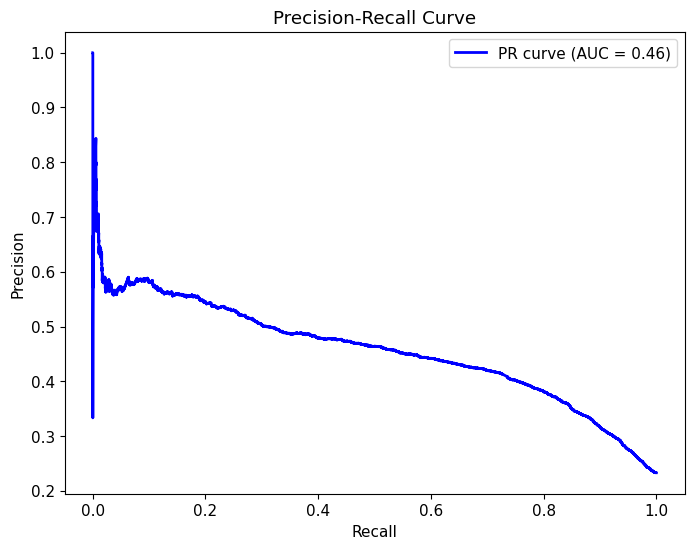

Max F1 Score: 0.5275028768699656
Threshold for Max F1 Score: 0.5106727019431204
ROC-AUC for Max F1 Threshold: 0.7066757364849005


In [ ]:
evaluate_classification_model(svm_classifier_best, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = svm_classifier_best.predict(X_train_sm)
# Predict on the testing set
y_test_pred = svm_classifier_best.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.692605


In [ ]:
import matplotlib.pyplot as plt

# Get feature coefficients (weights)
feature_coefficients = svm_classifier_best.coef_[0]

# Pair feature names with their respective coefficients
feature_coefficient_dict = dict(zip(df.columns, feature_coefficients))

# Sort feature coefficients in descending order
sorted_feature_coefficient = sorted(feature_coefficient_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature coefficients
print("Feature Coefficients:")
for feature, coefficient in sorted_feature_coefficient:
    print(f"{feature}: {coefficient:.4f}")

# Plot feature coefficients
plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_feature_coefficient], [x[1] for x in sorted_feature_coefficient], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.gca().invert_yaxis()
plt.show()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_sm,y_train_sm)

KNeighborsClassifier()

In [ ]:
y_probabilities = knn_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3583,8016,7633,1175,11599,8808,0.568383,0.319454,0.753047,0.448604,0.632642,0.298143,0.512237,0.632642,0.225459
1,0.45,2871,10410,5239,1887,13281,7126,0.650806,0.354007,0.603405,0.446223,0.634312,0.306078,0.665218,0.634312,0.232107
2,0.50,2871,10410,5239,1887,13281,7126,0.650806,0.354007,0.603405,0.446223,0.634312,0.306078,0.665218,0.634312,0.232107
3,0.55,2871,10410,5239,1887,13281,7126,0.650806,0.354007,0.603405,0.446223,0.634312,0.306078,0.665218,0.634312,0.232107
4,0.60,2871,10410,5239,1887,13281,7126,0.650806,0.354007,0.603405,0.446223,0.634312,0.306078,0.665218,0.634312,0.232107
5,0.65,1961,12638,3011,2797,14599,5808,0.715392,0.394409,0.412148,0.403083,0.609870,0.299616,0.807592,0.609870,0.216444
6,0.70,1961,12638,3011,2797,14599,5808,0.715392,0.394409,0.412148,0.403083,0.609870,0.299616,0.807592,0.609870,0.216444


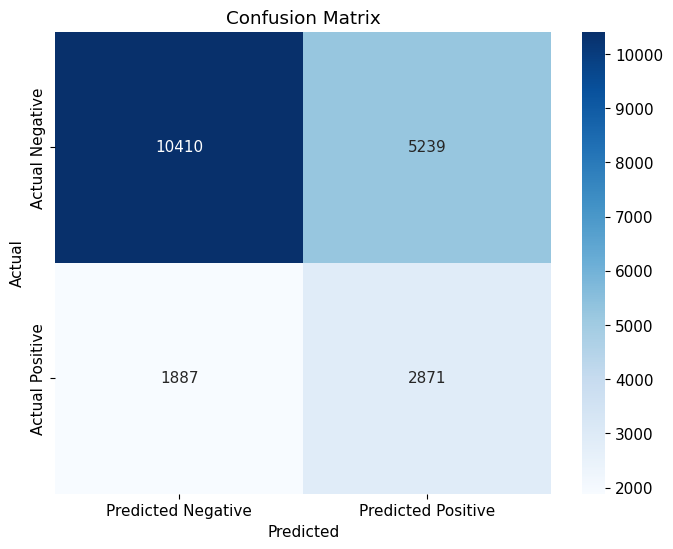

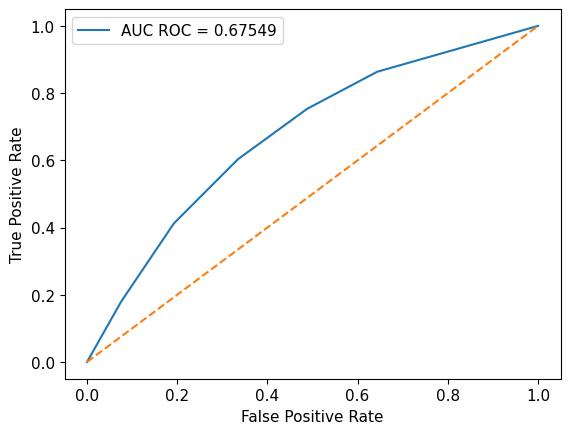

Accuracy: 0.650806095947469
Precision: 0.3540073982737361
Recall: 0.6034047919293821
F1 Score: 0.44622318930680754
AUC-ROC: 0.6754912860739557
pr_auc 0.41336935055339613


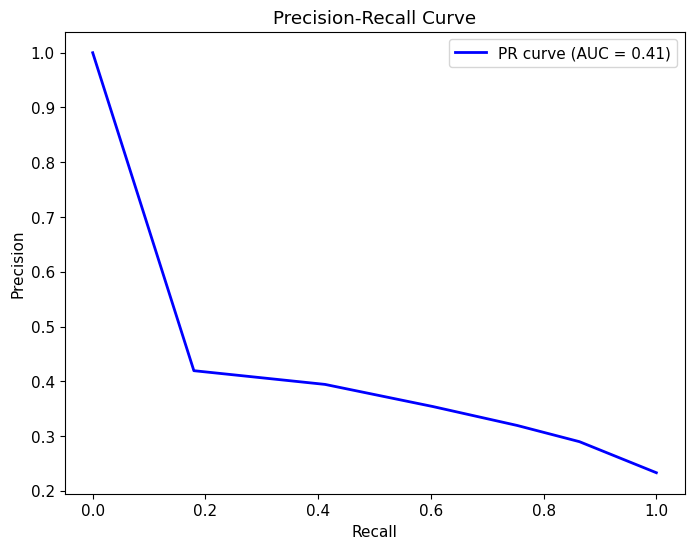

Max F1 Score: 0.4486039814698886
Threshold for Max F1 Score: 0.4
ROC-AUC for Max F1 Threshold: 0.632642351302162


In [ ]:
evaluate_classification_model(knn_model, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = knn_model.predict(X_train_sm)
# Predict on the testing set
y_test_pred = knn_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.85
Testing Accuracy:  0.650806


In [ ]:
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Create an empty dictionary to store feature importance scores
feature_importance_scores = defaultdict(int)

# Iterate over each feature
for feature in range(X_train_sm.shape[1]):
    # Remove the current feature from the training and testing data
    X_train_sm_subset = np.delete(X_train_sm, feature, axis=1)
    X_test_subset = np.delete(X_test, feature, axis=1)

    # Train a new KNN model on the modified training data
    knn_model_subset = KNeighborsClassifier()
    knn_model_subset.fit(X_train_sm_subset, y_train_sm)

    # Predict on the modified testing data
    y_test_pred_subset = knn_model_subset.predict(X_test_subset)

    # Calculate the accuracy score on the modified testing data
    accuracy_subset = accuracy_score(y_test, y_test_pred_subset)

    # Calculate the difference in accuracy after removing the feature
    feature_importance_scores[feature] = accuracy_score_original - accuracy_subset

# Sort feature importance scores in descending order
sorted_feature_importance = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Display feature importance scores
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"Feature {feature}: {importance:.4f}")


## KNN with hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
knn_tune_model = KNeighborsClassifier()
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': range(1, 40),
                   'weights':['uniform', 'distance'],
                   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size':[20,30,40,50,60]}
randomsearch = RandomizedSearchCV(knn_tune_model, hyperparameters,cv=3,n_iter=2)
randomsearch.fit(X_train_sm, y_train_sm)
best_params = randomsearch.best_params_
print(f"Best hyperparameters: {best_params}")
pd.DataFrame(randomsearch.cv_results_)[['param_n_neighbors','param_weights','param_algorithm','param_leaf_size','mean_test_score']]
# Best hyperparameters: {'weights': 'distance', 'n_neighbors': 18, 'leaf_size': 20, 'algorithm': 'auto'}

Best hyperparameters: {'weights': 'distance', 'n_neighbors': 18, 'leaf_size': 20, 'algorithm': 'auto'}


,param_n_neighbors,param_weights,param_algorithm,param_leaf_size,mean_test_score
0,22,uniform,brute,20,0.719777
1,18,distance,auto,20,0.767830


In [ ]:
knn_tune_model = KNeighborsClassifier()
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': range(1, 40),
                   'weights':['uniform', 'distance'],
                   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size':[20,30,40,50,60]}

# Create a Grid Search object with the KNN model and hyperparameters to tune
grid_search = GridSearchCV(knn_tune_model, hyperparameters, cv=5)

# Fit the Grid Search object to the training data
grid_search.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search.best_params_}')



In [ ]:
# Train the model with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(algorithm= 'auto', leaf_size= 20, n_neighbors= 18, weights= 'distance')
knn_best.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(leaf_size=20, n_neighbors=18, weights='distance')

In [ ]:
y_probabilities = knn_best.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3763,8589,7060,995,12352,8055,0.605283,0.347685,0.790879,0.483024,0.669866,0.323735,0.548853,0.669866,0.287835
1,0.45,3568,9415,6234,1190,12983,7424,0.636203,0.364007,0.749895,0.490110,0.675765,0.331281,0.601636,0.675765,0.297513
2,0.50,3365,10187,5462,1393,13552,6855,0.664086,0.381217,0.707230,0.495399,0.679099,0.337869,0.650968,0.679099,0.305716
3,0.55,3126,10855,4794,1632,13981,6426,0.685108,0.394697,0.656999,0.493138,0.675327,0.339288,0.693655,0.675327,0.304258
4,0.60,2821,11584,4065,1937,14405,6002,0.705885,0.409672,0.592896,0.484541,0.666568,0.337811,0.740239,0.666568,0.297912
5,0.65,2408,12297,3352,2350,14705,5702,0.720586,0.418056,0.506095,0.457882,0.645948,0.326732,0.785801,0.645948,0.274219
6,0.70,1996,13034,2615,2762,15030,5377,0.736512,0.432878,0.419504,0.426086,0.626200,0.316940,0.832897,0.626200,0.255197


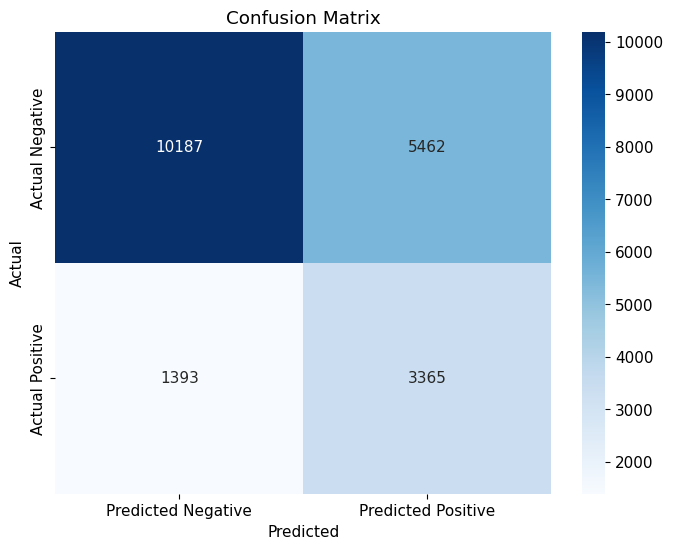

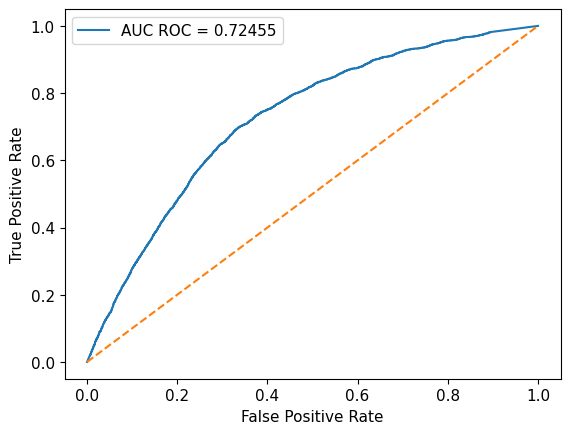

Accuracy: 0.6640858528936149
Precision: 0.38121672142290697
Recall: 0.707229928541404
F1 Score: 0.4953993375046006
AUC-ROC: 0.7245514252865061
pr_auc 0.4100413939216864


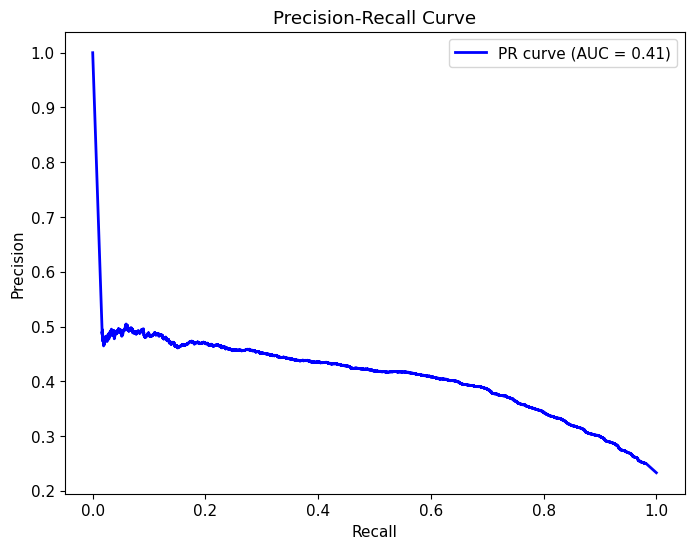

Max F1 Score: 0.49820035992801437
Threshold for Max F1 Score: 0.5094669620123446
ROC-AUC for Max F1 Threshold: 0.6811622056381843


In [ ]:
evaluate_classification_model(knn_best, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = knn_best.predict(X_train_sm)
# Predict on the testing set
y_test_pred = knn_best.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  1.00
Testing Accuracy:  0.664086


In [ ]:
# Get the best model from RandomizedSearchCV or GridSearchCV
best_knn_model = grid_search.best_estimator_

# Get feature importance scores from the best model
feature_importance_scores = best_knn_model.feature_importances_

# Pair feature names with their respective importance scores
feature_importance_dict = dict(zip(df.columns, feature_importance_scores))

# Sort feature importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importance scores
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier()

In [ ]:
y_probabilities = clf.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4535,2794,12855,223,7329,13078,0.359141,0.260782,0.953132,0.409518,0.565837,0.259487,0.178542,0.565837,0.156861
1,0.45,4458,3374,12275,300,7832,12575,0.383790,0.266420,0.936948,0.414871,0.576277,0.264322,0.215605,0.576277,0.167888
2,0.50,4347,4713,10936,411,9060,11347,0.443965,0.284434,0.913619,0.433811,0.607394,0.280004,0.301169,0.607394,0.209439
3,0.55,4221,5777,9872,537,9998,10409,0.489930,0.299510,0.887137,0.447828,0.628149,0.292021,0.369161,0.628149,0.234448
4,0.60,4095,6500,9149,663,10595,9812,0.519185,0.309197,0.860656,0.454949,0.638009,0.298601,0.415362,0.638009,0.244532
5,0.65,3949,7272,8377,809,11221,9186,0.549860,0.320380,0.829971,0.462304,0.647332,0.305549,0.464694,0.647332,0.254765
6,0.70,3748,7965,7684,1010,11713,8694,0.573970,0.327852,0.787726,0.463002,0.648352,0.307750,0.508978,0.648352,0.252756


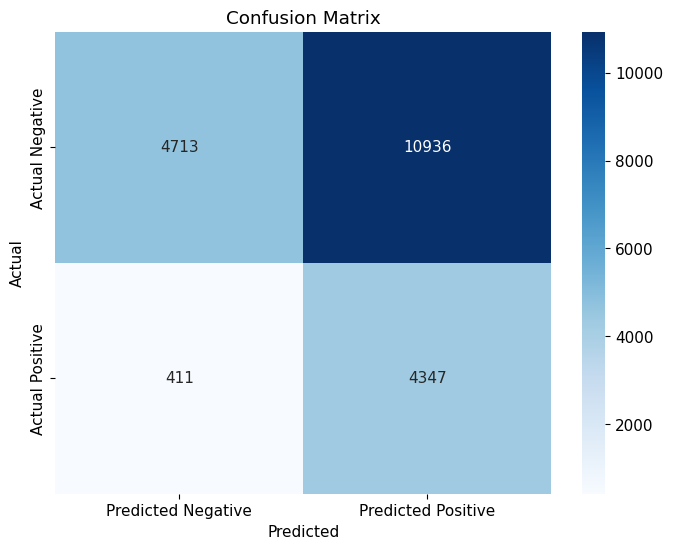

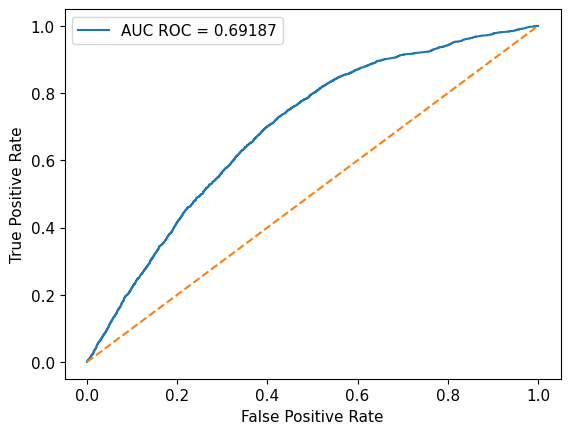

Accuracy: 0.4439653060224433
Precision: 0.28443368448603024
Recall: 0.9136191677175284
F1 Score: 0.43381068808941675
AUC-ROC: 0.6918685517792045
pr_auc 0.3601566926016969


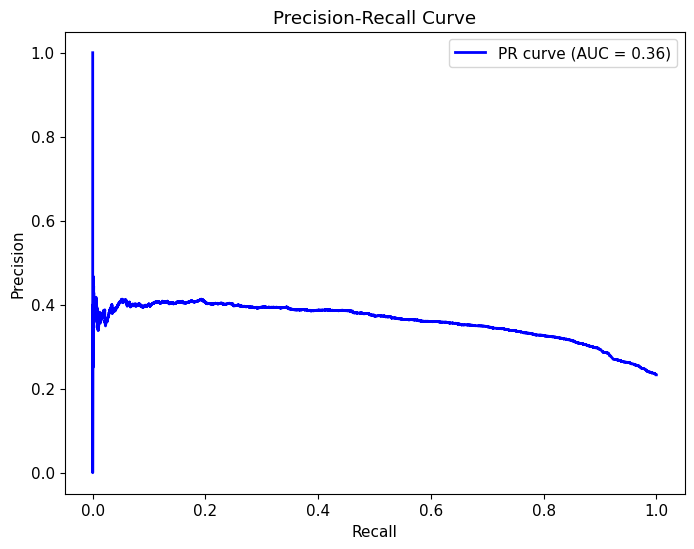

Max F1 Score: 0.4664558239687773
Threshold for Max F1 Score: 0.7560903231852278
ROC-AUC for Max F1 Threshold: 0.6521703890231079


In [ ]:
evaluate_classification_model(clf, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = clf.predict(X_train_sm)
# Predict on the testing set
y_test_pred = clf.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.83
Testing Accuracy:  0.443965


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = clf.feature_importances_

# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


## Gradient boosting with hyperparameter tuning

In [ ]:
gb_model = GradientBoostingClassifier()

# Define a parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    random_state=42
)
random_search.fit(X_train_sm, y_train_sm)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')
#Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1}


In [ ]:
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(max_depth=4, min_samples_split=10, n_estimators=50,
                           subsample=0.8)

In [ ]:
y_probabilities = best_gb_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4476,3327,12322,282,7803,12604,0.382369,0.266460,0.940731,0.415290,0.576666,0.264486,0.212601,0.576666,0.169929
1,0.45,4355,4794,10855,403,9149,11258,0.448327,0.286325,0.915301,0.436198,0.610823,0.281821,0.306345,0.610823,0.215117
2,0.50,4240,5781,9868,518,10021,10386,0.491057,0.300539,0.891131,0.449486,0.630274,0.293203,0.369417,0.630274,0.238492
3,0.55,4096,6592,9057,662,10688,9719,0.523742,0.311412,0.860866,0.457373,0.641053,0.300524,0.421241,0.641053,0.249211
4,0.60,3957,7252,8397,801,11209,9198,0.549272,0.320301,0.831652,0.462482,0.647534,0.305630,0.463416,0.647534,0.255267
5,0.65,3793,7926,7723,965,11719,8688,0.574264,0.329368,0.797184,0.466142,0.651835,0.309854,0.506486,0.651835,0.258959
6,0.70,3560,8591,7058,1198,12151,8256,0.595433,0.335280,0.748214,0.463059,0.648597,0.309566,0.548981,0.648597,0.251539


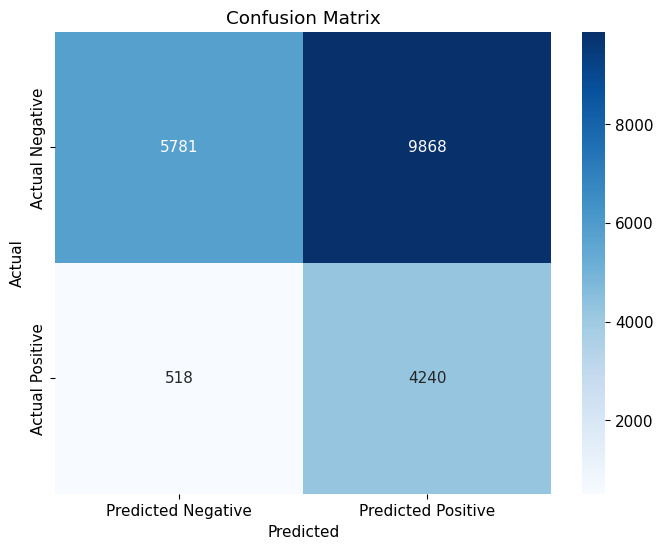

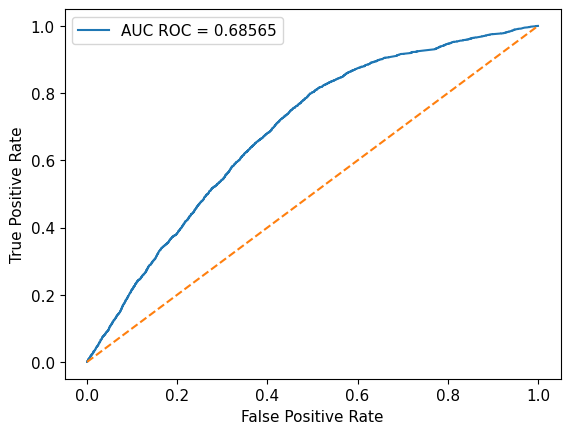

Accuracy: 0.4910569902484442
Precision: 0.3005387014459881
Recall: 0.8911307271963009
F1 Score: 0.44948584755645077
AUC-ROC: 0.6856509880436932
pr_auc 0.3530403899675289


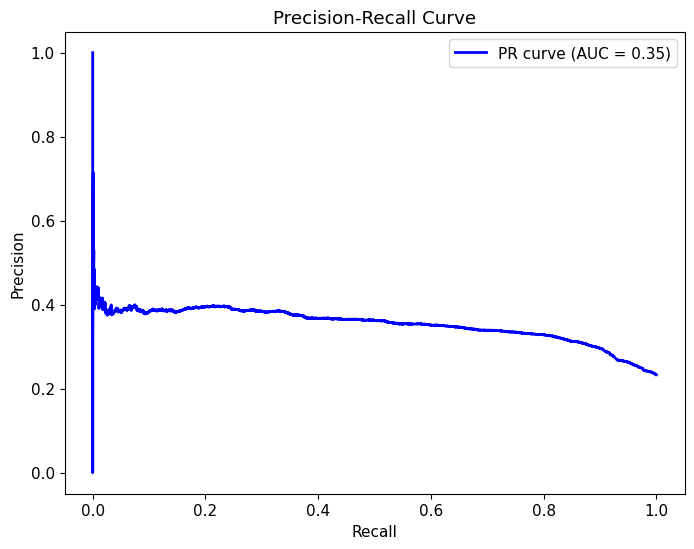

Max F1 Score: 0.466457988093046
Threshold for Max F1 Score: 0.6492334452259634
ROC-AUC for Max F1 Threshold: 0.6521870561504373


In [ ]:
evaluate_classification_model(best_gb_model, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = best_gb_model.predict(X_train_sm)
# Predict on the testing set
y_test_pred = best_gb_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.83
Testing Accuracy:  0.491057


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the best gradient boosting model
feature_importances = best_gb_model.feature_importances_

# Pair feature names with their respective importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# MLP

In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, random_state=42)
mlp.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500, random_state=42)

In [20]:
y_probabilities = mlp.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,2223,12478,3171,2535,14701,5706,0.720390,0.412125,0.467213,0.437943,0.632290,0.316772,0.797367,0.632290,0.253702
1,0.45,2002,12903,2746,2756,14905,5502,0.730387,0.421651,0.420765,0.421208,0.622645,0.312468,0.824526,0.622645,0.245470
2,0.50,1763,13271,2378,2995,15034,5373,0.736708,0.425743,0.370534,0.396224,0.609288,0.304515,0.848041,0.609288,0.229807
3,0.55,1545,13621,2028,3213,15166,5241,0.743176,0.432410,0.324716,0.370904,0.597562,0.297856,0.870407,0.597562,0.217097
4,0.60,1351,13941,1708,3407,15292,5115,0.749351,0.441648,0.283943,0.345657,0.587399,0.292355,0.890856,0.587399,0.207052
5,0.65,1141,14234,1415,3617,15375,5032,0.753418,0.446401,0.239807,0.312004,0.574693,0.284293,0.909579,0.574693,0.190833
6,0.70,942,14532,1117,3816,15474,4933,0.758269,0.457504,0.197982,0.276368,0.563302,0.277572,0.928622,0.563302,0.177738


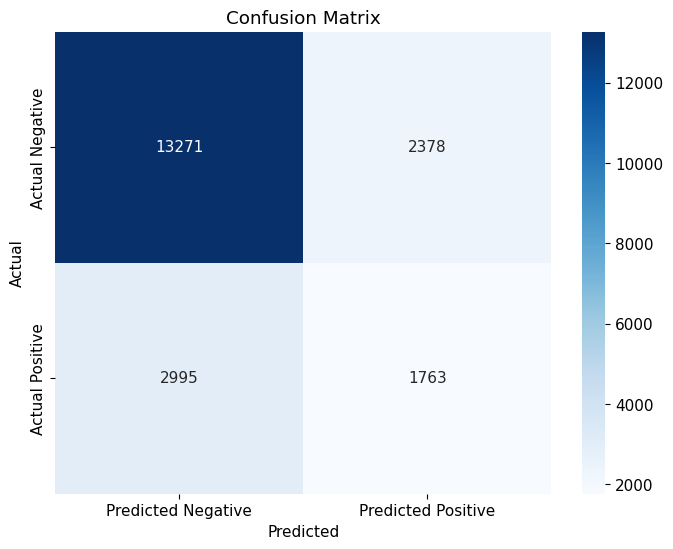

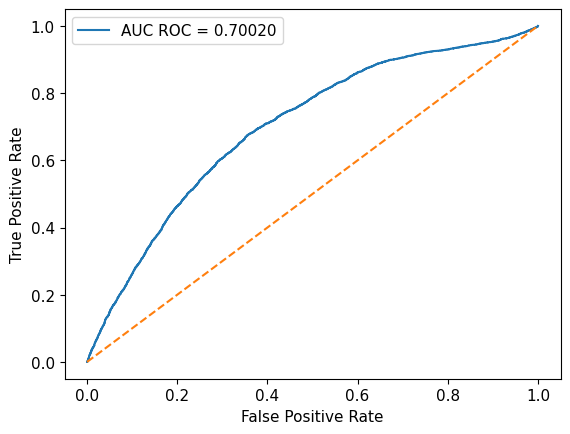

Accuracy: 0.7367079923555643
Precision: 0.42574257425742573
Recall: 0.3705338377469525
F1 Score: 0.39622429486459154
AUC-ROC: 0.7002022027415156
pr_auc 0.3915688515334643


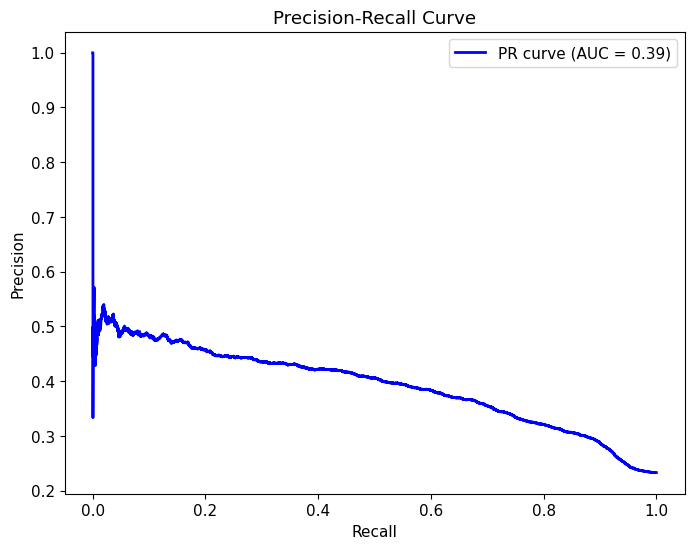

Max F1 Score: 0.4744837758112094
Threshold for Max F1 Score: 0.20604424110121558
ROC-AUC for Max F1 Threshold: 0.6596163039263159


In [21]:
evaluate_classification_model(mlp, X_test, y_test)

In [22]:
# Predict on the training set
y_train_pred = mlp.predict(X_train_sm)
# Predict on the testing set
y_test_pred = mlp.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.79
Testing Accuracy:  0.736708


In [23]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [25]:
import shap
import numpy as np

# Define mlp_predict function to wrap predict_proba for compatibility with SHAP
def mlp_predict(data):
    return mlp.predict_proba(data)

# Summarize the background data using shap.sample
background_data_summary = shap.sample(X_train_sm, 100)  # Use the correct variable name here

# Initialize the SHAP explainer with the summarized background data using KernelExplainer
explainer = shap.KernelExplainer(mlp_predict, background_data_summary)

# Sample your test data for SHAP explanations
X_test_sample = shap.sample(X_test, 100)

# Compute SHAP values for the sampled data
shap_values = explainer.shap_values(X_test_sample)


  0%|          | 0/100 [00:00<?, ?it/s]

In [26]:
# Check the shape of shap_values
print(len(shap_values))
print(np.array(shap_values[0]).shape)

100
(33, 2)


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming shap_values is your array of SHAP values
print("Shape of SHAP values:", np.array(shap_values).shape)

# Basic statistical analysis to understand distribution
mean_shap_values = np.mean(shap_values, axis=0)
print("Mean SHAP values per feature:", mean_shap_values)
print("Standard deviation of SHAP values per feature:", np.std(shap_values, axis=0))


Shape of SHAP values: (100, 33, 2)
Mean SHAP values per feature: [[ 0.02161921 -0.02161921]
 [ 0.01133649 -0.01133649]
 [-0.00373994  0.00373994]
 [ 0.00013937 -0.00013937]
 [ 0.00215479 -0.00215479]
 [ 0.00106715 -0.00106715]
 [-0.00050547  0.00050547]
 [ 0.00321489 -0.00321489]
 [ 0.00076611 -0.00076611]
 [ 0.01655352 -0.01655352]
 [ 0.00209671 -0.00209671]
 [ 0.00535988 -0.00535988]
 [ 0.00277195 -0.00277195]
 [ 0.01073799 -0.01073799]
 [ 0.00980725 -0.00980725]
 [ 0.01211416 -0.01211416]
 [ 0.02874768 -0.02874768]
 [-0.00084622  0.00084622]
 [ 0.00226358 -0.00226358]
 [ 0.00136634 -0.00136634]
 [-0.00540206  0.00540206]
 [ 0.00110713 -0.00110713]
 [ 0.01749499 -0.01749499]
 [ 0.02171041 -0.02171041]
 [ 0.01653203 -0.01653203]
 [ 0.00042669 -0.00042669]
 [ 0.00301636 -0.00301636]
 [ 0.00936598 -0.00936598]
 [ 0.00264713 -0.00264713]
 [ 0.00103889 -0.00103889]
 [ 0.01378233 -0.01378233]
 [ 0.          0.        ]
 [ 0.0112341  -0.0112341 ]]
Standard deviation of SHAP values per featu

In [28]:
import numpy as np

# Separate the SHAP values for each aspect/class
shap_values_class0 = shap_values[:, :, 0]
shap_values_class1 = shap_values[:, :, 1]


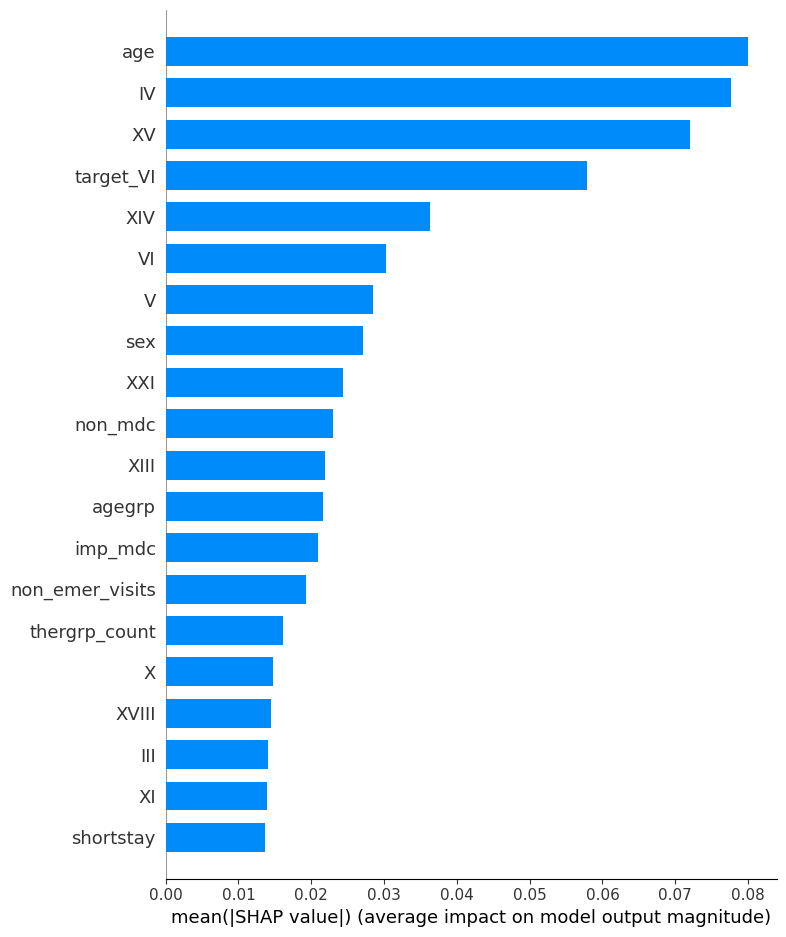

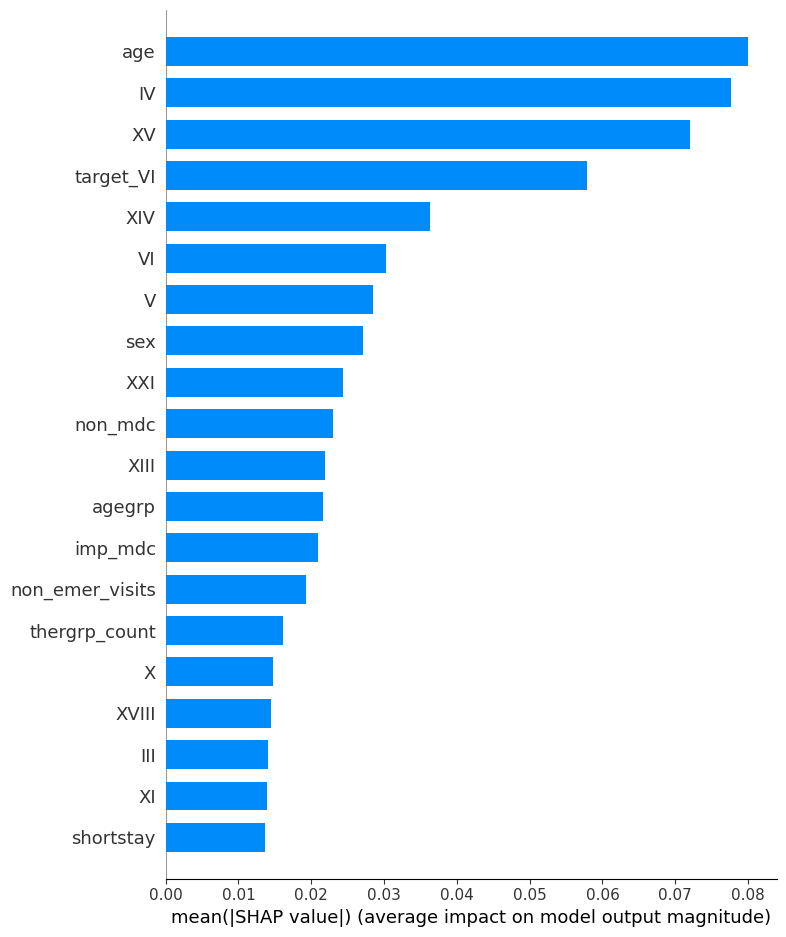

In [30]:
import shap
import matplotlib.pyplot as plt

# Ensure that X is your feature dataframe from which 'X_test' is derived
feature_names = X.columns.tolist()

# Subset of X_test that matches the SHAP values
X_test_sample = X_test[:100]  # Assuming the first 100 instances are those used for SHAP

# Summary plot for class 0 using the corresponding subset of X_test
shap.summary_plot(shap_values_class0, X_test_sample, feature_names=feature_names, show=False, plot_type='bar', title="SHAP Summary Plot - Class 0")
plt.show()

# Summary plot for class 1 using the corresponding subset of X_test
shap.summary_plot(shap_values_class1, X_test_sample, feature_names=feature_names, show=False, plot_type='bar', title="SHAP Summary Plot - Class 1")
plt.show()


# MLP with hyperparameter tuning

In [31]:
# Define a dictionary of hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create an MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create a RandomSearchCV object
random_search = RandomizedSearchCV(mlp, param_grid, cv=5, scoring='roc_auc')

random_search.fit(X_train_sm, y_train_sm)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')
# Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'tanh'}

NameError: name 'RandomizedSearchCV' is not defined

In [ ]:
best_mlp_model = MLPClassifier(max_iter=500, random_state=42, **best_params)
best_mlp_model.fit(X_train_sm, y_train_sm)

d:\faacode\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42)

In [ ]:
y_probabilities = best_mlp_model.predict_proba(X_test)[:, 1]
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3650,8057,7592,1108,11707,8700,0.573676,0.324675,0.767129,0.456250,0.640993,0.303363,0.514857,0.640993,0.239715
1,0.45,3509,8581,7068,1249,12090,8317,0.592444,0.331758,0.737495,0.457646,0.642918,0.305874,0.548342,0.642918,0.241888
2,0.50,3372,8992,6657,1386,12364,8043,0.605871,0.336225,0.708701,0.456076,0.641653,0.306201,0.574605,0.641653,0.239622
3,0.55,3213,9390,6259,1545,12603,7804,0.617582,0.339210,0.675284,0.451581,0.637661,0.304773,0.600038,0.637661,0.233435
4,0.60,3072,9733,5916,1686,12805,7602,0.627481,0.341789,0.645649,0.446966,0.633803,0.303295,0.621957,0.633803,0.227932
5,0.65,2892,10072,5577,1866,12964,7443,0.635272,0.341481,0.607818,0.437287,0.625719,0.298997,0.643619,0.625719,0.215777
6,0.70,2719,10367,5282,2039,13086,7321,0.641251,0.339833,0.571459,0.426209,0.616965,0.294117,0.662470,0.616965,0.202606


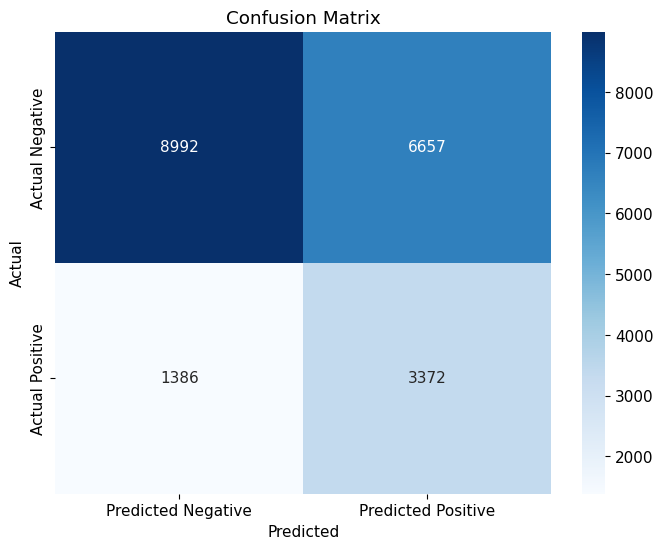

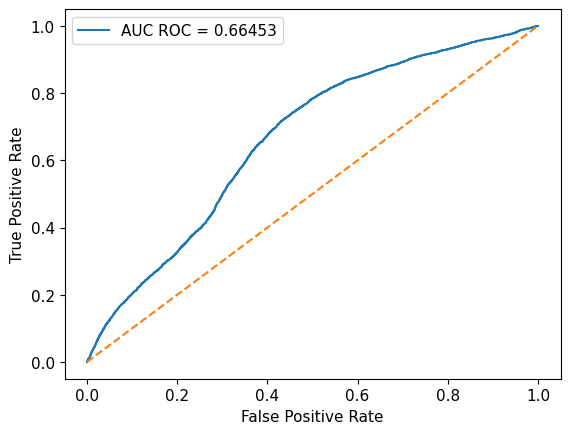

Accuracy: 0.6058705346204734
Precision: 0.33622494765180977
Recall: 0.7087011349306431
F1 Score: 0.45607628322174887
AUC-ROC: 0.6645318910372247
pr_auc 0.3451216362169433


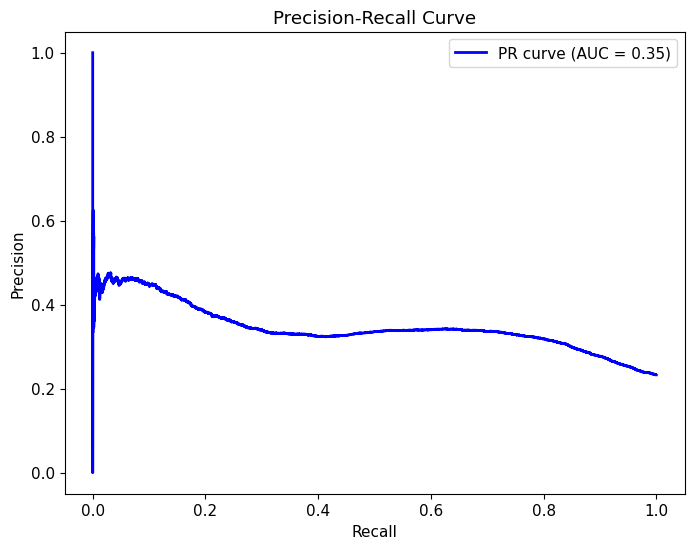

Max F1 Score: 0.4580628408205661
Threshold for Max F1 Score: 0.4447771375850654
ROC-AUC for Max F1 Threshold: 0.6433173374574334


In [ ]:
evaluate_classification_model(best_mlp_model, X_test, y_test)

In [ ]:
# Predict on the training set
y_train_pred = best_mlp_model.predict(X_train_sm)
# Predict on the testing set
y_test_pred = best_mlp_model.predict(X_test)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.79
Testing Accuracy:  0.605871


In [ ]:
import shap
import numpy as np


# Wrap the predict function of MLPClassifier in a callable function
def mlp_predict(data):
    return best_mlp_model.predict_proba(data)

# Summarize the background data using shap.sample or shap.kmeans
background_data_summary = shap.sample(X_train_us, 100)  # Adjust the number of samples as needed

# Initialize the SHAP explainer with the summarized background data using KernelExplainer
explainer = shap.KernelExplainer(mlp_predict, background_data_summary)

# Sample your test data for SHAP explanations
X_test_sample = shap.sample(X_test, 100)

# Compute SHAP values for the sampled data
shap_values = explainer.shap_values(X_test_sample)


